In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
df = pd.read_excel('D:\Irvan\Kerja Praktik\SO Outstanding Adminjul 15 Juli 2025.xlsx')
df.head()

,Nomor Kontrak,Nomor Sales Order,Deskripsi Material,Tanggal SO Dibuat,Nama Distributor,Quantity SO,PGI qty,Outstanding SO,Billing Quantity,Tanggal PGI,...,Harga Total(Incl PPn),Total,Harga Jual (exc. PPN),Sektor,Tanggal Dokumen,Tanggal SO Released,Provinsi Distributor,Kabupaten Distributor,Distributor,Nomor Material
0,2.100073e+09,3101295142,Kaptan @50KG,2025-05-14,YASIDA MAKMUR ABADI,5.0,5.0,0.0,5.0,23-05-2025,...,1500000,1351351,270270,KEBUN,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,1000002467,1000274
1,2.100073e+09,3101295142,Petrocas @50KG,2025-05-14,YASIDA MAKMUR ABADI,5.0,5.0,0.0,5.0,23-05-2025,...,1475000,1328829,265766,KEBUN,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,1000002467,1000272
2,2.100073e+09,3101295232,Kaptan @50KG,2025-05-14,DOHAR AGRO MANDIRI,24.0,24.0,0.0,24.0,19-05-2025,...,7200000,6486487,270270,KEBUN,2025-05-14,2025-05-14,BENGKULU,KOTA BENGKULU,1000001444,1000274
3,2.100072e+09,3101295279,"NPK 13-6-27 +4Mg+0,65B NS @50KG",2025-05-14,BUKIT AGROCHEMICAL BARU,24.0,24.0,0.0,24.0,14-05-2025,...,161172000,145200000,6050000,KEBUN,2025-05-14,2025-05-14,KALIMANTAN TENGAH,KAB. LAMANDAU,1000006971,1000092
4,2.100073e+09,3101295310,Neutralized Crude Gypsum,2025-05-14,GRESIK CIPTA SEJAHTERA,500.0,500.0,0.0,500.0,"14-05-2025, 15-05-2025, 15-05-2025, 16-05-2025...",...,39960000,36000000,72000,INDUSTRI,2025-05-14,2025-05-14,JAWA TIMUR,KAB. GRESIK,2000000058,1001970


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Kontrak          3367 non-null   float64       
 1   Nomor Sales Order      3453 non-null   int64         
 2   Deskripsi Material     3453 non-null   object        
 3   Tanggal SO Dibuat      3453 non-null   datetime64[ns]
 4   Nama Distributor       3453 non-null   object        
 5   Quantity SO            3453 non-null   float64       
 6   PGI qty                3453 non-null   float64       
 7   Outstanding SO         3453 non-null   float64       
 8   Billing Quantity       3453 non-null   float64       
 9   Tanggal PGI            3305 non-null   object        
 10  Incoterm 1             3453 non-null   object        
 11  Incoterm 2             3453 non-null   object        
 12  End User/Pengecer      3439 non-null   object        
 13  SO 

In [4]:
print("Total Client Masih Kotor: ", df['Nama Distributor'].nunique())

Total Client Masih Kotor:  326


In [5]:
print(df['Nama Distributor'].unique())

['YASIDA MAKMUR ABADI' 'DOHAR AGRO MANDIRI' 'BUKIT AGROCHEMICAL BARU'
 'GRESIK CIPTA SEJAHTERA' 'AHIMSA BANGKIT UTAMA' 'TANINDO PERKASA'
 'STANLEY CHEMINDO' 'TUMBUH BERKEMBANG' 'PETRO KARYA MANDIRI'
 'PURNA BUANA YUDHA' 'BERLIAN MAKMUR' 'STAR GOOD HERO'
 'KOPINDO CIPTA SEJAHTERA' 'INDONESIA ASAHAN ALUMINIUM' 'BUANA PRIMA'
 'LADANG HIJAU' 'CAHAYA ABADI MENES' 'PERTIWI TANI' 'ALAM KARIMA'
 'CIPTA NIAGA INDONESIA' 'ROSMALA MULTI SARANA EXPRES' 'BUMI LAWU MANDIRI'
 'ADI JAYA MANDIRI' 'LABAN RAYA SAMODRA' 'MUJIARTO' 'FIMACO'
 'ABK MITRA MANDIRI' 'LADANG INDONESIA CITRA MANDIRI' 'SUGESTY'
 'PREMIERE MAKMUR ANUGRAH' 'UNITAMA MAKMUR ABADI' 'SEDIA JAYA' 'AL  AIZAR'
 'WATAMA PRIMA' 'ADIKERSA MARTAPURA AMARTYA' 'SATONA' 'LIKU TELAGA'
 'SINAR BUANA LOGISTIK' 'UNIVERSAL AGRO CHEMINDO'
 'BERLIAN INTI SUKSES PERKASA' 'TANI MUDA SULAWESI' 'INDO DINO TRADINDO'
 'SEHAT CEMERLANG SEJAHTERA' 'PETROSIDA GRESIK' 'BHAKTI NUSANTARA'
 'BUMI IMPERIUM INDONESIA' 'PUPUK ISKANDAR MUDA' 'ADITYA MANDIRI UTAMA'
 'SET

In [6]:
# Menghapus Dep. Pengelolaan Pelanggan karena bukan termasuk client
df = df[df['Nama Distributor']!='DEPT. PENGELOLAAN PELANGGAN']
print("Total Client Bersih: ", df['Nama Distributor'].nunique())

Total Client Bersih:  325


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3452
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Kontrak          3367 non-null   float64       
 1   Nomor Sales Order      3367 non-null   int64         
 2   Deskripsi Material     3367 non-null   object        
 3   Tanggal SO Dibuat      3367 non-null   datetime64[ns]
 4   Nama Distributor       3367 non-null   object        
 5   Quantity SO            3367 non-null   float64       
 6   PGI qty                3367 non-null   float64       
 7   Outstanding SO         3367 non-null   float64       
 8   Billing Quantity       3367 non-null   float64       
 9   Tanggal PGI            3228 non-null   object        
 10  Incoterm 1             3367 non-null   object        
 11  Incoterm 2             3367 non-null   object        
 12  End User/Pengecer      3353 non-null   object        
 13  SO Legac

In [8]:
#Mengambil Fitur Penting dalam Dataset
cols = [
    'Nomor Sales Order','Deskripsi Material','Nama Distributor','Quantity SO',
    'Harga/Ton(Incl PPn)','Harga Total(Incl PPn)',
    'Sektor','Tanggal SO Released','Provinsi Distributor'
]
df = df.loc[:, cols]
df.head()

,Nomor Sales Order,Deskripsi Material,Nama Distributor,Quantity SO,Harga/Ton(Incl PPn),Harga Total(Incl PPn),Sektor,Tanggal SO Released,Provinsi Distributor
0,3101295142,Kaptan @50KG,YASIDA MAKMUR ABADI,5.0,300000,1500000,KEBUN,2025-05-14,JAWA TIMUR
1,3101295142,Petrocas @50KG,YASIDA MAKMUR ABADI,5.0,295000,1475000,KEBUN,2025-05-14,JAWA TIMUR
2,3101295232,Kaptan @50KG,DOHAR AGRO MANDIRI,24.0,300000,7200000,KEBUN,2025-05-14,BENGKULU
3,3101295279,"NPK 13-6-27 +4Mg+0,65B NS @50KG",BUKIT AGROCHEMICAL BARU,24.0,6715500,161172000,KEBUN,2025-05-14,KALIMANTAN TENGAH
4,3101295310,Neutralized Crude Gypsum,GRESIK CIPTA SEJAHTERA,500.0,79920,39960000,INDUSTRI,2025-05-14,JAWA TIMUR


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3452
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nomor Sales Order      3367 non-null   int64         
 1   Deskripsi Material     3367 non-null   object        
 2   Nama Distributor       3367 non-null   object        
 3   Quantity SO            3367 non-null   float64       
 4   Harga/Ton(Incl PPn)    3367 non-null   int64         
 5   Harga Total(Incl PPn)  3367 non-null   int64         
 6   Sektor                 3367 non-null   object        
 7   Tanggal SO Released    3367 non-null   datetime64[ns]
 8   Provinsi Distributor   3367 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 263.0+ KB


In [10]:
df.to_excel('data_kp_bersih.xlsx')

# Exploratory Data Analysis

In [11]:
# Create the copy of data so the data wouldn't be overwritten
df_eda = df.copy()

# Validate the shape of data
print("Shape of `df`:", df.shape)
print("Shape of `df_eda`:", df_eda.shape)

Shape of `df`: (3367, 9)
Shape of `df_eda`: (3367, 9)


In [12]:
df_eda.describe()

,Nomor Sales Order,Quantity SO,Harga/Ton(Incl PPn),Harga Total(Incl PPn),Tanggal SO Released
count,3.367000e+03,3367.000000,3.367000e+03,3.367000e+03,3367
mean,3.101273e+09,2357.066555,2.479350e+06,7.189438e+08,2025-03-24 10:21:25.179685120
min,3.101224e+09,0.500000,0.000000e+00,0.000000e+00,2024-12-02 00:00:00
25%,3.101248e+09,22.250000,2.950000e+05,1.056795e+07,2025-01-24 00:00:00
50%,3.101272e+09,53.000000,3.000000e+05,3.996000e+07,2025-03-21 00:00:00
75%,3.101300e+09,500.000000,5.350000e+06,3.842948e+08,2025-05-21 00:00:00
max,3.101327e+09,340334.000000,2.591850e+07,1.225436e+11,2025-07-15 00:00:00
std,2.963730e+04,18830.277386,3.792724e+06,4.509448e+09,NaN


* All values is positive, which is rational because neither of value can be negative
* There are potential outlier in Quantity SO and Harga Total(Incl PPn). Need further analysis to proof

In [13]:
#check posibilities of missing value
df_eda.isna().sum()

Nomor Sales Order        0
Deskripsi Material       0
Nama Distributor         0
Quantity SO              0
Harga/Ton(Incl PPn)      0
Harga Total(Incl PPn)    0
Sektor                   0
Tanggal SO Released      0
Provinsi Distributor     0
dtype: int64

From analysis above, we conclude that there is no missing value of the data

In [14]:
# Check First and Last Transaction in Dataset
print(f'Date of First Transaction is :', {str(df_eda["Tanggal SO Released"].min())})
print(f'Date of Last Transaction is :', {str(df_eda["Tanggal SO Released"].max())})

Date of First Transaction is : {'2024-12-02 00:00:00'}
Date of Last Transaction is : {'2025-07-15 00:00:00'}


From analysis above, we conclude that data consist of 8 months transaction

#### Create RFM Features

Recency (R)
Recency refers to the time elapsed since a customer's last interaction or transaction with a company. It measures how recently a customer has engaged with the business

Frequency (F)
Frequency represents the number of transaction occurs. It measures how often a customer engages with the business.

Monetary (M)
Monetary refers to the total monetary value of a customer's transactions or purchases.

In [15]:
# Set the last trasaction data to became the reference date
last_trans_date = pd.to_datetime('2025-07-15 00:00:00')

last_trans_date

Timestamp('2025-07-15 00:00:00')

In [16]:
# Create function to make RFM Analysis
def recency_value(x):
    """"""
    return (last_trans_date - x.max()).days

def frequency_value(x):
    """"""
    return len(set(x))

def retrieve_rfms(df):
    """"""
    # Generate value of sales transaction --> Sales = Quantity SO x Harga/Ton(Incl PPn)
    df["Sales"] = df["Harga Total(Incl PPn)"]

    # Aggregate by 'Nama Distributor' to retrieve RFM
    dict_agg_data = {
        'Tanggal SO Released' : [recency_value],
        'Nomor Sales Order' : frequency_value,
        'Sales' : 'sum'
    }

    rfm_data = df.groupby('Nama Distributor').agg(dict_agg_data)

    # Change name of column
    rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

    return rfm_data

In [17]:
rfm_data_eda = retrieve_rfms(df = df_eda)
# Validate the output
# Rows of rfm_data_eda == unique number of Nama Distributor
print('Shape of RFM datashape :', rfm_data_eda.shape)
assert rfm_data_eda.shape[0] == len(set(df_eda['Nama Distributor']))

Shape of RFM datashape : (325, 3)


In [18]:
# Do sanity check
rfm_data_eda.head()

,Recency,Frequency,Monetary
Nama Distributor,,,
AAA,125,4,9125000000
ABADI AULIA JAYA,27,7,38920000
ABADI KIMIA,12,21,2545980638
ABK MITRA MANDIRI,35,3,18235000
ACME INDONESIA,4,1,6785000


In [19]:
# Check data description of `rfm_data_eda`
rfm_data_eda.describe()

,Recency,Frequency,Monetary
count,325.000000,325.000000,3.250000e+02
mean,54.203077,10.141538,7.448258e+09
std,58.997400,27.527511,4.122967e+10
min,0.000000,1.000000,8.850000e+05
25%,12.000000,2.000000,3.272500e+07
50%,29.000000,5.000000,1.200000e+08
75%,74.000000,9.000000,1.244595e+09
max,224.000000,441.000000,6.626955e+11


Based on EDA on statistical descriptive in rfm_data_eda, there is no negative value in all columns

In [20]:
# Check for frequency == 1 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Frequency'] == 1]

,Recency,Frequency,Monetary
Nama Distributor,,,
ACME INDONESIA,4,1,6785000
AGRO NUSANTARA INDONESIA,20,1,4181006808
AGRO SANTANINDO,70,1,30000000
AGRO SENTOSA,187,1,41000000
AGRO SUMBER MAKMUR,96,1,4572500
...,...,...,...
TAZAR GUNA MANDIRI,166,1,3375000
TRANS AGRO SEJAHTERA,70,1,2950000
TRITUNGGAL MANDIRI,78,1,3360000000


There are 72 companies one on time purchaser

In [21]:
# Monetary
rfm_data_eda[rfm_data_eda['Frequency'] == 1]['Monetary'].describe()

count    7.200000e+01
mean     3.913302e+08
std      1.207503e+09
min      8.850000e+05
25%      5.187500e+06
50%      1.070000e+07
75%      4.275000e+07
max      8.003000e+09
Name: Monetary, dtype: float64

There are customers who be the one-time purchaser on data

#### Data Distribution 

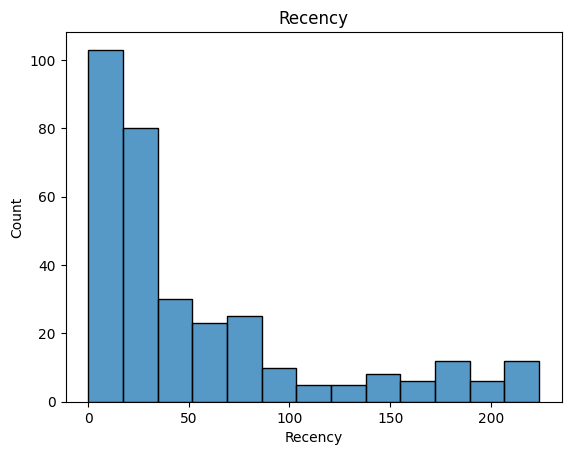

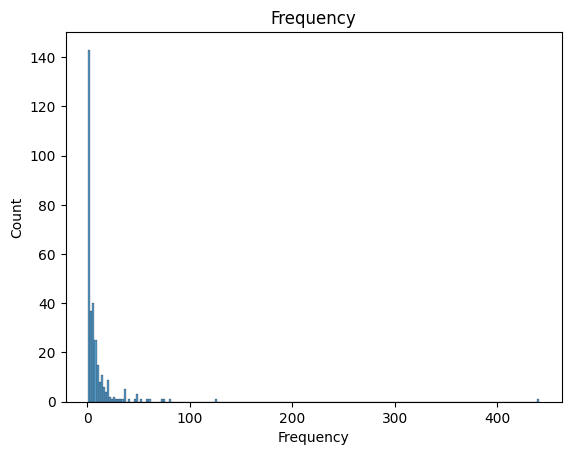

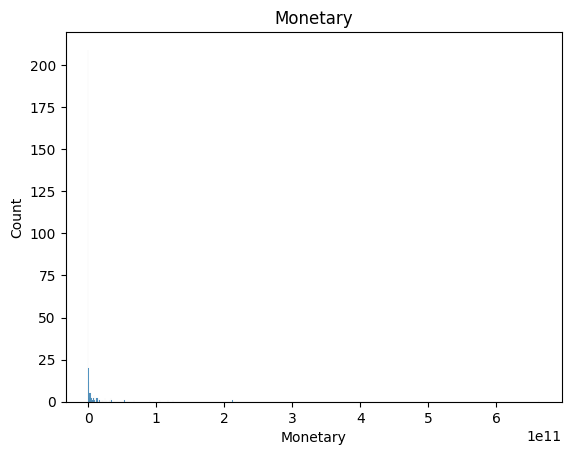

In [22]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

There are many outliers

In [23]:
rfm_data_eda.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [24]:
rfm_data_eda.shape

(325, 3)

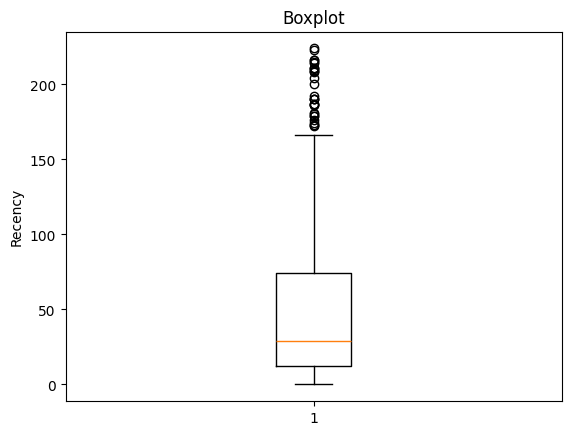

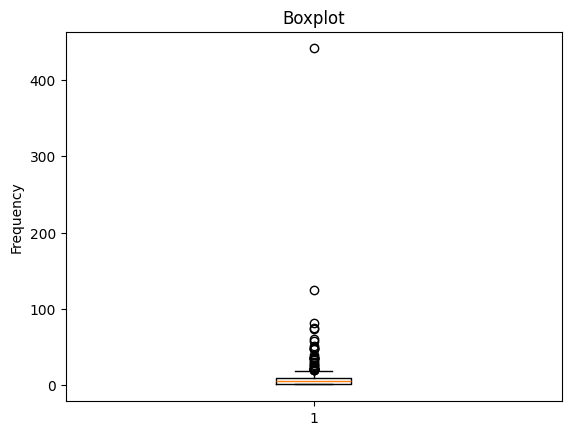

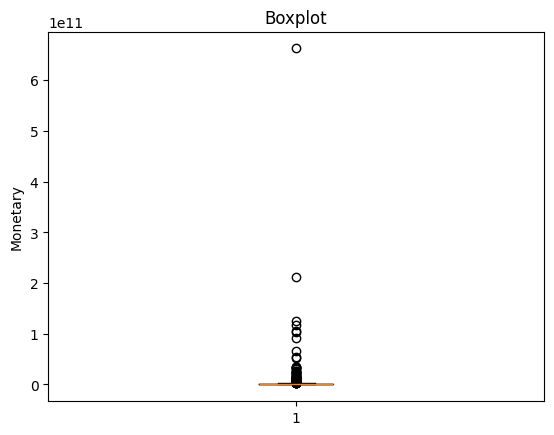

In [25]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    plt.boxplot(rfm_data_eda[col])
    plt.title('Boxplot')
    plt.ylabel(col)
    plt.show()

Outlier mewakili pelanggan besar atau penting sehingga tidak perlu dihapus, karena nilai ekstrem inilah yang menunjukkan pelanggan paling berharga — jika dihapus, maka akan kehilangan insight paling penting. ⚙️ Tidak perlu hapus, tapi lakukan scaling robust

# Data Preprocessing

#### Normalize Data

Nilai Monetary masih terlalu tinggi dibandingkan Recency/Frequency, sehingga bisa dilakukan log transformation sebelum scaling:

Log transformasi data adalah teknik mengubah skala data dengan mengganti setiap nilai asli (x) dengan nilai logaritma dari nilai tersebut (misalnya log(x)) untuk mengurangi kemiringan (skewness) dan membuat distribusi data menjadi lebih simetris. Tujuannya adalah agar data lebih sesuai dengan asumsi model statistik, sehingga analisis menjadi lebih akurat dan mudah diinterpretasikan. 

In [26]:
rfm_data_eda['Recency_log'] = np.log1p(rfm_data_eda['Recency'])
rfm_data_eda['Frequency_log'] = np.log1p(rfm_data_eda['Frequency'])
rfm_data_eda['Monetary_log'] = np.log1p(rfm_data_eda['Monetary'])

In [27]:
rfm_data_eda

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
Nama Distributor,,,,,,
AAA,125,4,9125000000,4.836282,1.609438,22.934284
ABADI AULIA JAYA,27,7,38920000,3.332205,2.079442,17.477019
ABADI KIMIA,12,21,2545980638,2.564949,3.091042,21.657782
ABK MITRA MANDIRI,35,3,18235000,3.583519,1.386294,16.718853
ACME INDONESIA,4,1,6785000,1.609438,0.693147,15.730225
...,...,...,...,...,...,...
WIHARTA KARYA AGUNG,22,7,146301100,3.135494,2.079442,18.801177
YASIDA MAKMUR ABADI,62,11,51300000,4.143135,2.484907,17.753201
YOSOMULYO JAJAG,5,11,150225300,1.791759,2.484907,18.827647


setelah transformasikan ke log, akan dilakukan scaling robust

In [28]:
from sklearn.preprocessing import RobustScaler

# Pilih kolom yang akan diskalakan
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# Inisialisasi scaler
scaler = RobustScaler()

# Fit dan transform
rfm_scaled = scaler.fit_transform(rfm_data_eda[features])

# Kembalikan ke bentuk DataFrame dengan nama kolom baru
import pandas as pd
rfm_scaled = pd.DataFrame(
    rfm_scaled,
    columns=['Recency_log_robust', 'Frequency_log_robust', 'Monetary_log_robust'],
    index=rfm_data_eda.index
)


In [29]:
rfm_scaled

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust
Nama Distributor,,,
AAA,0.818860,-0.151433,1.190427
ABADI AULIA JAYA,-0.039367,0.238944,-0.309470
ABADI KIMIA,-0.477164,1.079163,0.839588
ABK MITRA MANDIRI,0.104033,-0.336773,-0.517847
ACME INDONESIA,-1.022379,-0.912489,-0.789566
...,...,...,...
WIHARTA KARYA AGUNG,-0.151610,0.238944,0.054467
YASIDA MAKMUR ABADI,0.423350,0.575717,-0.233563
YOSOMULYO JAJAG,-0.918347,0.575717,0.061742


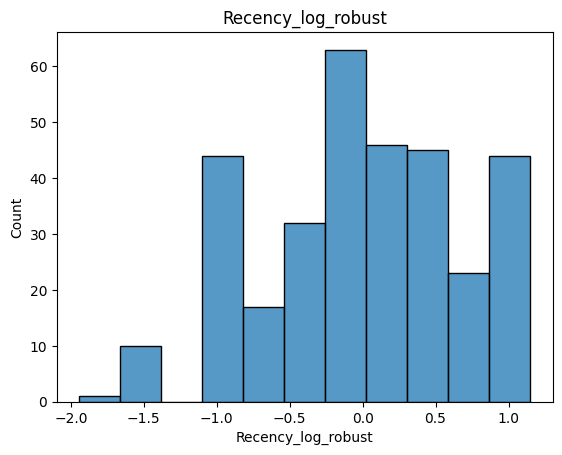

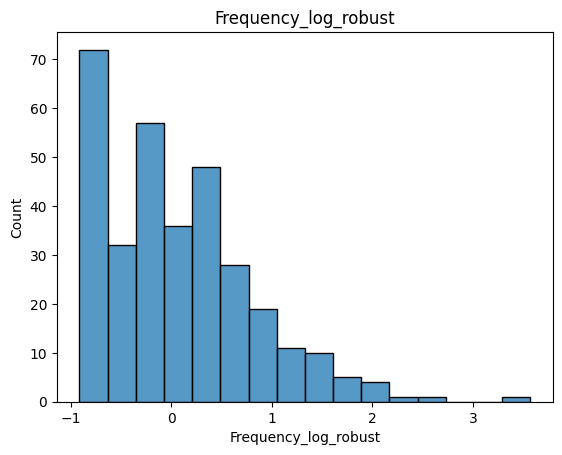

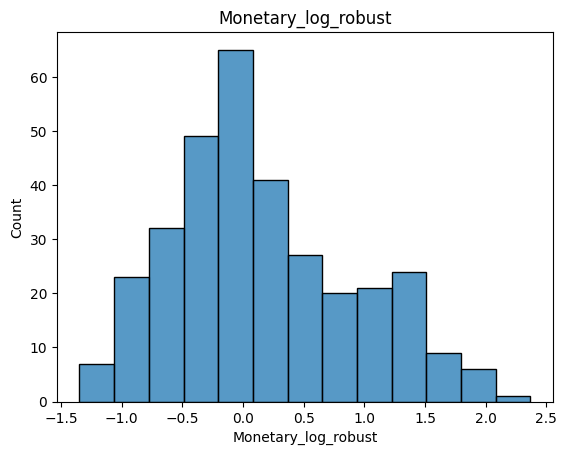

In [30]:
# Try to plot the distribution after log transform and robust scaler
for col in rfm_scaled.columns:
    x = rfm_scaled[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

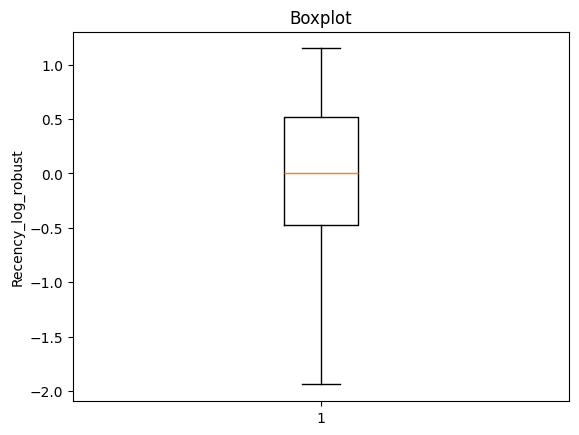

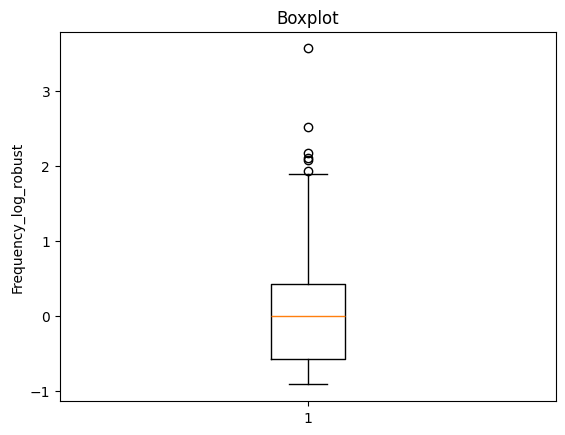

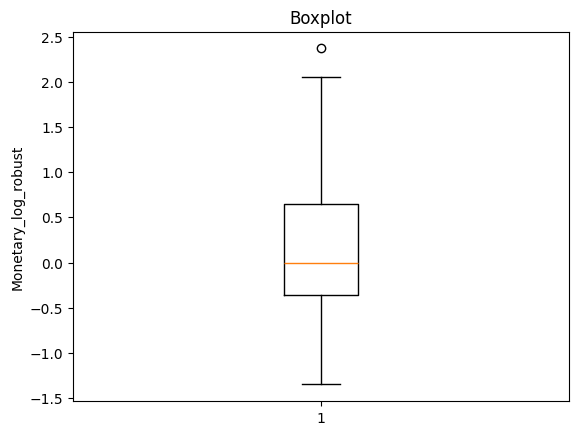

In [31]:
# Try to plot the distribution
for col in rfm_scaled.columns:
    plt.boxplot(rfm_scaled[col])
    plt.title('Boxplot')
    plt.ylabel(col)
    plt.show()

In [32]:
rfm_scaled.shape

(325, 3)

In [33]:
rfm_scaled.describe()

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust
count,325.000000,325.000000,325.000000
mean,-0.000551,0.010971,0.152652
std,0.684491,0.783053,0.753520
min,-1.940726,-0.912489,-1.349391
25%,-0.477164,-0.575717,-0.357119
50%,0.000000,0.000000,0.000000
75%,0.522836,0.424283,0.642881
max,1.149705,3.571136,2.368216


Pipeline Preprocessing

# Clustering

* Ranking Method
* K-Means clustering

**Ranking Method**

In [34]:
# Copy dataset firsts
df_bin = rfm_scaled.copy()

We should determine how many bins that want to be plotted in data. The numbers of bin determine by the business resource and needs to treat the cluster. This method is performed by Arthur Hughes that each bin of the three RFM attributes independently into five equal bins

In [35]:
def rfm_binning(df):
    """
    Function to devided the data into several binning and ranking the bin

    Parameters
    ---------
    df : pandas DataFrame
        Input to binning method (DataFrame)

    Returns
    -------
    df : pandas DataFrame
        Output of binning method
    """
    # Calculate the quantile of each variable 
    quant = df.quantile(q=[0.2,0.4,0.6,0.8])

    # Create bin base on variable
    r_bins = [-np.inf] + list(quant['Recency_log_robust']) + [np.inf]
    f_bins = [-np.inf] + list(quant['Frequency_log_robust']) + [np.inf]
    m_bins = [-np.inf] + list(quant['Monetary_log_robust']) + [np.inf]

    # Create label for bins
    labels = [1, 2, 3, 4, 5]

    # Label for Recency (Lower Recency, Higher Ranking)
    labels_r = [5, 4, 3, 2, 1]

    # Create bin into 5 groups
    df['R_Group'] = pd.cut(df['Recency_log_robust'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Frequency_log_robust'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary_log_robust'], bins=m_bins, labels=labels).astype(int)

    # RFM Score average
    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df


#### Ilustrasi Proses Pembentukan Grup pada rfm_binning

Misalkan kita punya data Recency_log_robust, Frequency_log_robust, dan Monetary_log_robust untuk 10 pelanggan:

| Pelanggan | Recency_log_robust | Frequency_log_robust | Monetary_log_robust |
|-----------|--------------------|----------------------|---------------------|
| A         | -1.2               | 0.5                  | 0.7                 |
| B         | -0.8               | 0.7                  | 0.9                 |
| C         | -0.3               | 1.0                  | 1.2                 |
| D         | 0.1                | 1.2                  | 1.5                 |
| E         | 0.4                | 1.5                  | 1.7                 |
| F         | 0.7                | 1.7                  | 2.0                 |
| G         | 1.0                | 2.0                  | 2.2                 |
| H         | 1.3                | 2.2                  | 2.5                 |
| I         | 1.7                | 2.5                  | 2.7                 |
| J         | 2.0                | 2.8                  | 3.0                 |

Setelah dihitung quantile pada q=[0.2,0.4,0.6,0.8],
misal hasilnya:
- Recency_log_robust: [-0.7, 0.2, 0.8, 1.4]
- Frequency_log_robust: [0.8, 1.3, 1.9, 2.3]
- Monetary_log_robust: [1.0, 1.6, 2.1, 2.6]

Maka pembagian grup:
- Recency (R_Group, label 5 terbaik):
  - <= -0.7 → 5
  - >-0.7 & <=0.2 → 4
  - >0.2 & <=0.8 → 3
  - >0.8 & <=1.4 → 2
  - >1.4 → 1
- Frequency (F_Group, label 5 tertinggi):
  - <=0.8 → 1
  - >0.8 & <=1.3 → 2
  - >1.3 & <=1.9 → 3
  - >1.9 & <=2.3 → 4
  - >2.3 → 5
- Monetary (M_Group, label 5 tertinggi):
  - <=1.0 → 1
  - >1.0 & <=1.6 → 2
  - >1.6 & <=2.1 → 3
  - >2.1 & <=2.6 → 4
  - >2.6 → 5

Setiap pelanggan akan mendapat label grup sesuai letak nilainya pada interval di atas. Contoh:
- Pelanggan A: R_Group=5, F_Group=1, M_Group=1
- Pelanggan J: R_Group=1, F_Group=5, M_Group=5

RFM_Score = rata-rata dari ketiga grup tersebut.

Data negatif tidak mempengaruhi perhitungan quantile secara teknis—quantile tetap membagi data menjadi proporsi yang sama, terlepas dari apakah nilainya negatif, nol, atau positif. Namun, nilai negatif akan mempengaruhi posisi batas quantile (misal, quantile 20% bisa berada pada nilai negatif jika banyak data di bawah nol)

In [36]:
# Devide data into bin
df_bin = rfm_binning(df_bin)

In [37]:

# Check the data output
df_bin.head()

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score
Nama Distributor,,,,,,,
AAA,0.818860,-0.151433,1.190427,1,3,5,3.00
ABADI AULIA JAYA,-0.039367,0.238944,-0.309470,3,4,2,3.00
ABADI KIMIA,-0.477164,1.079163,0.839588,4,5,4,4.33
ABK MITRA MANDIRI,0.104033,-0.336773,-0.517847,3,2,1,2.00
ACME INDONESIA,-1.022379,-0.912489,-0.789566,5,1,1,2.33


In [38]:
# Check the data output
df_bin.head()

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score
Nama Distributor,,,,,,,
AAA,0.818860,-0.151433,1.190427,1,3,5,3.00
ABADI AULIA JAYA,-0.039367,0.238944,-0.309470,3,4,2,3.00
ABADI KIMIA,-0.477164,1.079163,0.839588,4,5,4,4.33
ABK MITRA MANDIRI,0.104033,-0.336773,-0.517847,3,2,1,2.00
ACME INDONESIA,-1.022379,-0.912489,-0.789566,5,1,1,2.33


In [39]:
# Check the data type
df_bin.dtypes

Recency_log_robust      float64
Frequency_log_robust    float64
Monetary_log_robust     float64
R_Group                   int64
F_Group                   int64
M_Group                   int64
RFM_Score               float64
dtype: object

In [40]:
# Check the statistic descriptive stats
df_bin.describe()

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-0.000551,0.010971,0.152652,3.067692,2.932308,2.993846,2.997815
std,0.684491,0.783053,0.753520,1.447124,1.449256,1.418558,1.213059
min,-1.940726,-0.912489,-1.349391,1.000000,1.000000,1.000000,1.000000
25%,-0.477164,-0.575717,-0.357119,2.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000
75%,0.522836,0.424283,0.642881,4.000000,4.000000,4.000000,4.000000
max,1.149705,3.571136,2.368216,5.000000,5.000000,5.000000,5.000000


* For RFM score 0-1 will be assigned as Dissatisfied Customers
* For RFM score 1-2 will be assigned as Sporadic Shoppers
* For RFM score 2-3 will be assigned as Deal-Driven Shoppers
* For RFM score 3-4 will be assigned as Loyal Consumers
* For RFM score 4-5 will be assigned as Enthusiastic Shoppers

In [41]:
def assign_segmentation(df_rfm):
    """
    Function to assign RFM_Score to each segment

    Parameters
    ----------
    df_rfm : pandas DataFrame
        Binned and preprocessed rfm dataframe
    
    Returns
    -------
    df_rfm : pandas DataFrame
        Rfm dataframe that have been segmented by name
  
    """
    # Assign name of each segment
    labels = ['Dissatisfied Customers', 'Sporadic Shoppers', 
              'Deal-Driven Shoppers', 'Loyal Consumers', 
              'Enthusiastic Shoppers']
    
    df_rfm['Segment'] = pd.cut(df_rfm['RFM_Score'],
                                bins = [0, 1, 2, 3, 4, 5],
                                labels = labels)
    
    return df_rfm

In [42]:
# Create labels bins
df_bin = assign_segmentation(df_bin)

In [43]:
# Check the dataset
df_bin.head()

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score,Segment
Nama Distributor,,,,,,,,
AAA,0.818860,-0.151433,1.190427,1,3,5,3.00,Deal-Driven Shoppers
ABADI AULIA JAYA,-0.039367,0.238944,-0.309470,3,4,2,3.00,Deal-Driven Shoppers
ABADI KIMIA,-0.477164,1.079163,0.839588,4,5,4,4.33,Enthusiastic Shoppers
ABK MITRA MANDIRI,0.104033,-0.336773,-0.517847,3,2,1,2.00,Sporadic Shoppers
ACME INDONESIA,-1.022379,-0.912489,-0.789566,5,1,1,2.33,Deal-Driven Shoppers


* Plot each cluster using boxplot
* Plot each cluster using scatter plot for RFM Variables

In [44]:
# Check data bin with RFM score > 4
df_bin[df_bin['RFM_Score'] > 4]

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score,Segment
Nama Distributor,,,,,,,,
ABADI KIMIA,-0.477164,1.079163,0.839588,4,5,4,4.33,Enthusiastic Shoppers
ADI JAYA MANDIRI,-1.022379,1.510963,1.408884,5,5,5,5.00,Enthusiastic Shoppers
AGRO AFIAT NUSANTARA,-0.686988,0.128035,1.158070,5,3,5,4.33,Enthusiastic Shoppers
AGRO BERKAH PRIMA,-1.022379,0.000000,1.012446,5,3,5,4.33,Enthusiastic Shoppers
AGRO BINA LESTARI,-0.686988,0.503446,0.609015,5,4,4,4.33,Enthusiastic Shoppers
...,...,...,...,...,...,...,...,...
SURYA WIJAYA MULYA,-0.830388,1.079163,1.189149,5,5,5,5.00,Enthusiastic Shoppers
TOYA INDO MANUNGGAL,-1.545216,0.336773,1.526419,5,4,5,4.67,Enthusiastic Shoppers
TRI SAKTI LESTARI,-0.477164,0.814661,0.908032,4,5,5,4.67,Enthusiastic Shoppers


In [45]:
# Check data bin with RFM score 3 - 4
df_bin[(df_bin['RFM_Score'] > 3) & (df_bin['RFM_Score'] <= 4)]

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust,R_Group,F_Group,M_Group,RFM_Score,Segment
Nama Distributor,,,,,,,,
ADIKERSA MARTAPURA AMARTYA,-0.686988,-0.336773,0.000000,5,2,3,3.33,Loyal Consumers
ADITYA MANDIRI UTAMA,-0.830388,-0.336773,0.388259,5,2,4,3.67,Loyal Consumers
AGRO NUSANTARA INDONESIA,-0.203519,-0.912489,0.975921,4,1,5,3.33,Loyal Consumers
AGRO PERSADA MAS,-0.918347,0.703752,-0.213076,5,5,2,4.00,Loyal Consumers
AGRO SUMBER RAHAYU,-0.203519,0.336773,-0.150605,4,4,2,3.33,Loyal Consumers
...,...,...,...,...,...,...,...,...
TUMBUH BERKEMBANG,-0.686988,-0.336773,-0.079068,5,2,3,3.33,Loyal Consumers
TUNAS SAWA ERMA,0.218536,-0.151433,1.428227,2,3,5,3.33,Loyal Consumers
WAHANA ORGANIK MULIAJAYA,-0.918347,-0.151433,0.000000,5,3,3,3.67,Loyal Consumers


* Plot each cluster using boxplot
* Plot each cluster using scatter plot for RFM Variables

In [46]:
df_bin.columns

Index(['Recency_log_robust', 'Frequency_log_robust', 'Monetary_log_robust',
       'R_Group', 'F_Group', 'M_Group', 'RFM_Score', 'Segment'],
      dtype='object')

In [47]:
# Create rfm_score_df yang menggabungkan data dari df_bin dan rfm_data_eda
rfm_score_df = pd.DataFrame()

# Ambil kolom R_Group, F_Group, M_Group, RFM_Score, dan Segment dari df_bin
rfm_score_df = df_bin[['R_Group', 'F_Group', 'M_Group', 'RFM_Score', 'Segment']].copy()

# Gabungkan dengan kolom Recency, Frequency, Monetary dari rfm_data_eda berdasarkan index (Nama Distributor)
rfm_score_df = rfm_score_df.merge(
    rfm_data_eda[['Recency', 'Frequency', 'Monetary']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)

# Reorder kolom untuk kemudahan pembacaan
column_order = ['Recency', 'Frequency', 'Monetary', 'R_Group', 'F_Group', 'M_Group', 'RFM_Score', 'Segment']
rfm_score_df = rfm_score_df[column_order]

# Display hasil
print("Shape of rfm_score_df:", rfm_score_df.shape)
print("\nFirst 10 rows of rfm_score_df:")
rfm_score_df.head(10)

Shape of rfm_score_df: (325, 8)

First 10 rows of rfm_score_df:


,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Nama Distributor,,,,,,,,
AAA,125,4,9125000000,1,3,5,3.00,Deal-Driven Shoppers
ABADI AULIA JAYA,27,7,38920000,3,4,2,3.00,Deal-Driven Shoppers
ABADI KIMIA,12,21,2545980638,4,5,4,4.33,Enthusiastic Shoppers
ABK MITRA MANDIRI,35,3,18235000,3,2,1,2.00,Sporadic Shoppers
ACME INDONESIA,4,1,6785000,5,1,1,2.33,Deal-Driven Shoppers
ADI JAYA MANDIRI,4,36,20203488260,5,5,5,5.00,Enthusiastic Shoppers
ADIKERSA MARTAPURA AMARTYA,8,3,120000000,5,2,3,3.33,Loyal Consumers
ADITYA MANDIRI UTAMA,6,3,492820000,5,2,4,3.67,Loyal Consumers
ADRIAN MITRA MANDIRI,190,2,72000000,1,2,2,1.67,Sporadic Shoppers


#### Analisis distribusi nilai RFM asli (Recency, Frequency, Monetary) berdasarkan segmen pelanggan

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12792\1380116882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_score_df, y='Segment', x='Recency', ax=axes[0], palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12792\1380116882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_score_df, y='Segment', x='Frequency', ax=axes[1], palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12792\1380116882.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_score_df, y='Segment', x='Monetary', ax=axes[2

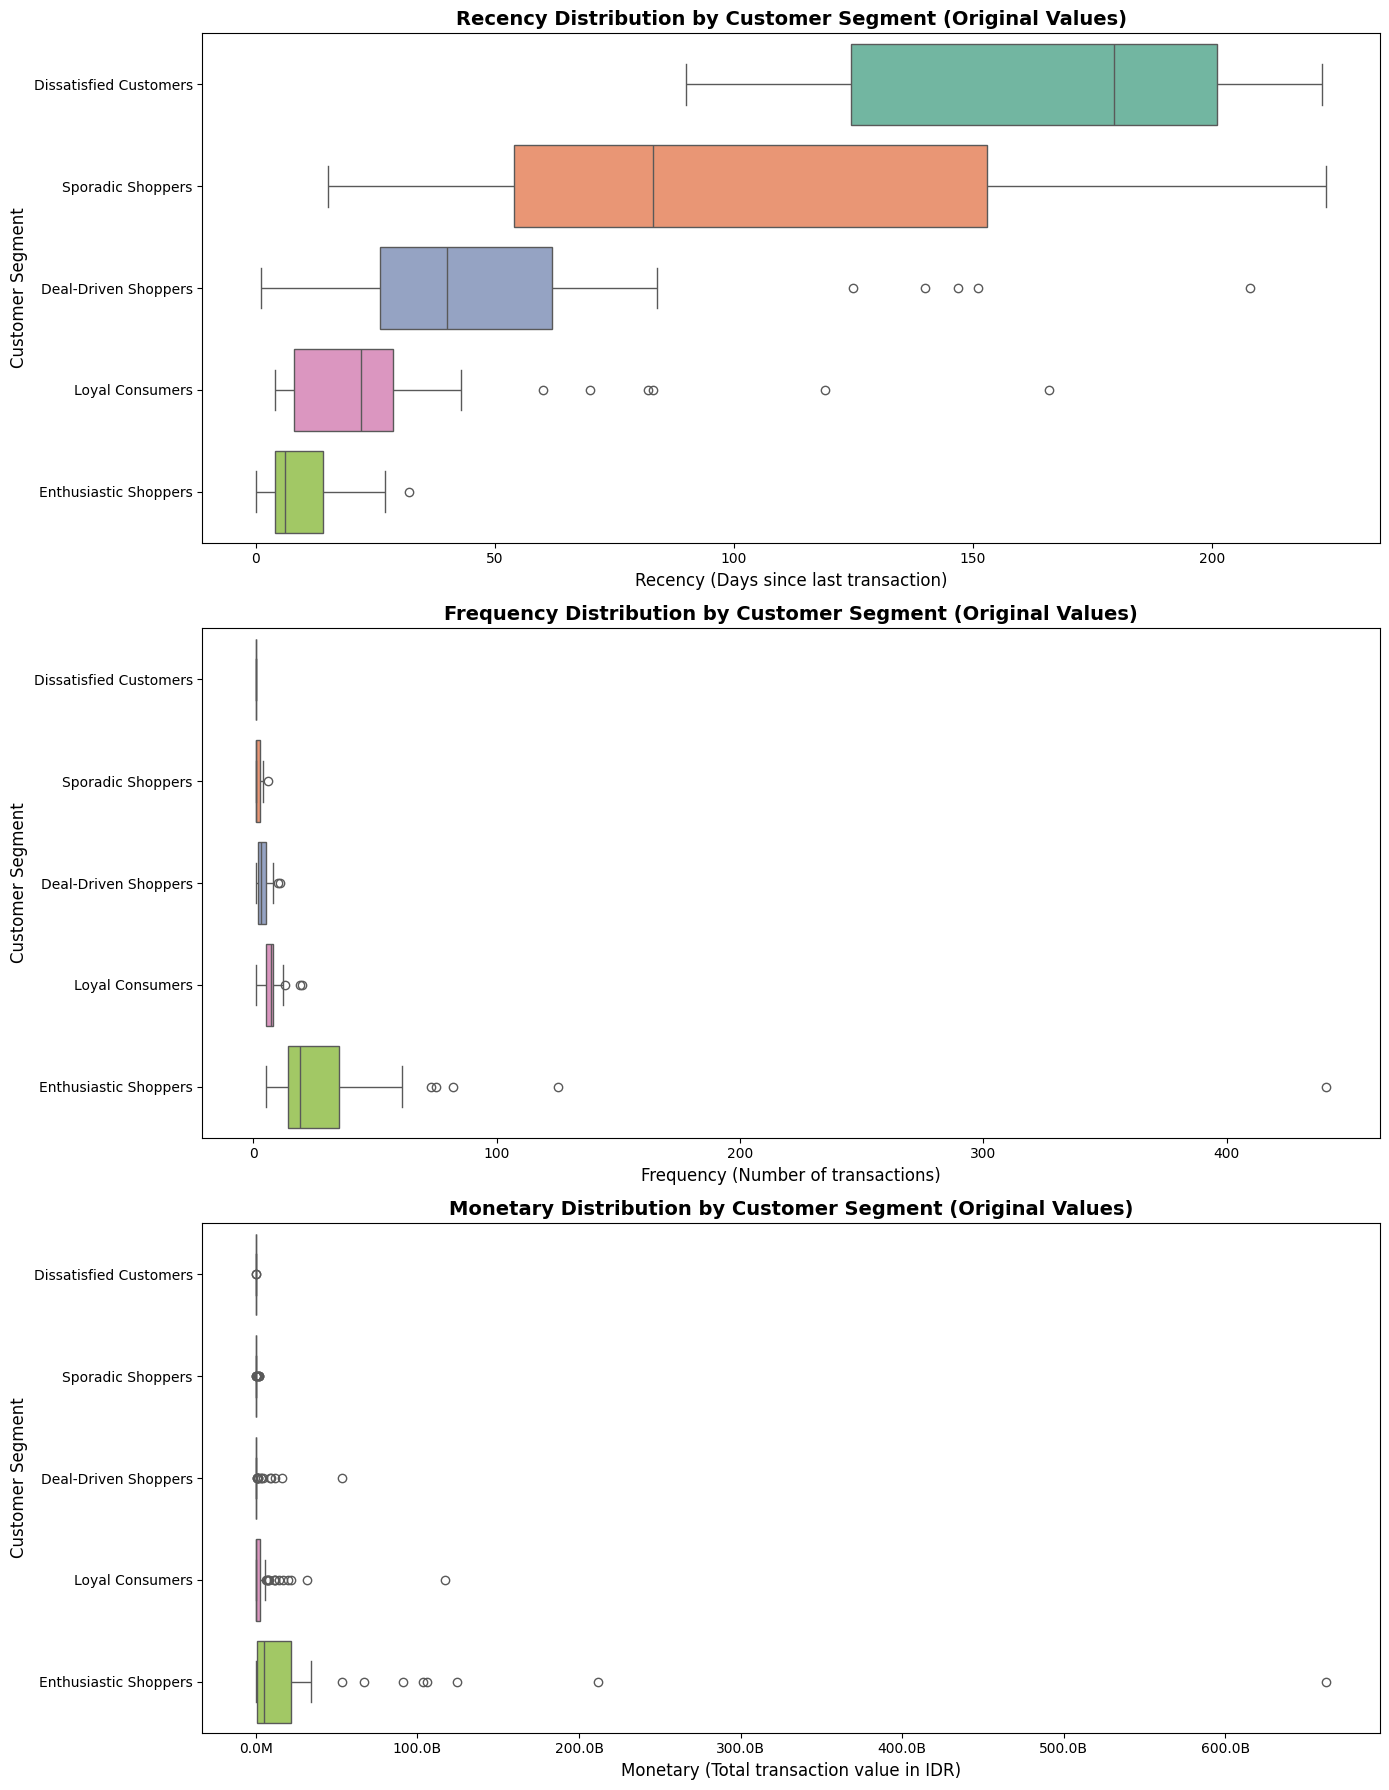

In [48]:
# --- Boxplots untuk setiap segmen dengan nilai RFM asli ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Boxplot untuk Recency
sns.boxplot(data=rfm_score_df, y='Segment', x='Recency', ax=axes[0], palette='Set2')
axes[0].set_title('Recency Distribution by Customer Segment (Original Values)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Recency (Days since last transaction)', fontsize=12)
axes[0].set_ylabel('Customer Segment', fontsize=12)

# Boxplot untuk Frequency
sns.boxplot(data=rfm_score_df, y='Segment', x='Frequency', ax=axes[1], palette='Set2')
axes[1].set_title('Frequency Distribution by Customer Segment (Original Values)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency (Number of transactions)', fontsize=12)
axes[1].set_ylabel('Customer Segment', fontsize=12)

# Boxplot untuk Monetary
sns.boxplot(data=rfm_score_df, y='Segment', x='Monetary', ax=axes[2], palette='Set2')
axes[2].set_title('Monetary Distribution by Customer Segment (Original Values)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Monetary (Total transaction value in IDR)', fontsize=12)
axes[2].set_ylabel('Customer Segment', fontsize=12)

# Format angka pada sumbu x untuk Monetary
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

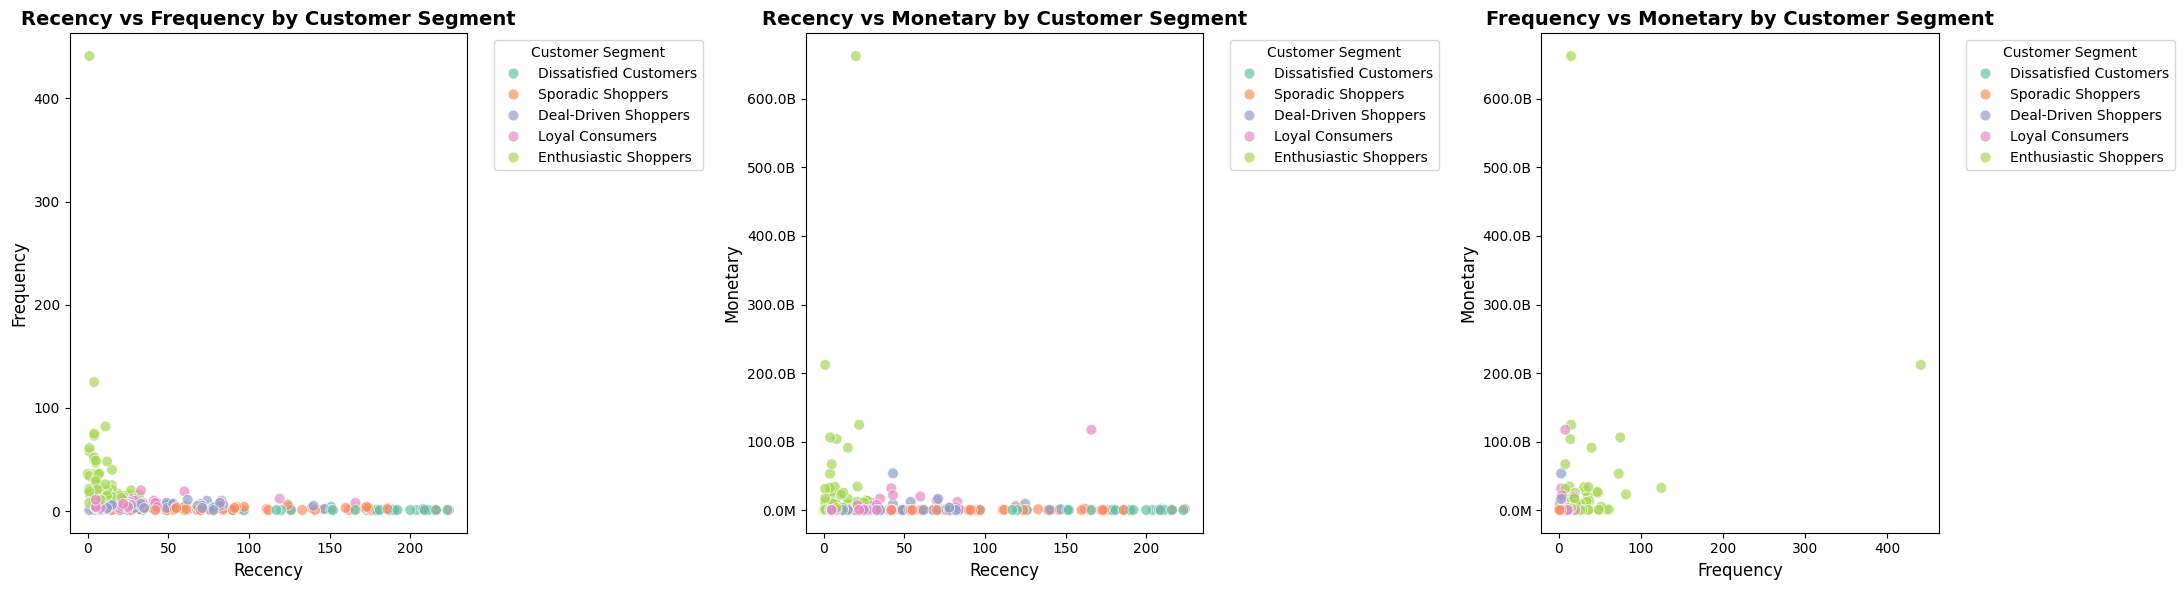

In [49]:
# --- Scatter plots untuk variabel RFM berdasarkan segmen (nilai asli) ---
import itertools

# Create pairs of RFM variables for scatter plots
rfm_original_cols = ['Recency', 'Frequency', 'Monetary']
pairs = list(itertools.combinations(rfm_original_cols, 2))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

for i, (x_col, y_col) in enumerate(pairs):
    sns.scatterplot(data=rfm_score_df, x=x_col, y=y_col, hue='Segment', 
                   ax=axes[i], palette='Set2', alpha=0.7, s=60)
    axes[i].set_title(f'{x_col} vs {y_col} by Customer Segment', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{x_col}', fontsize=12)
    axes[i].set_ylabel(f'{y_col}', fontsize=12)
    axes[i].legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Format axes untuk readability
    if x_col == 'Monetary':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.1f}M'))
    if y_col == 'Monetary':
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

#### Interpretasi Aggregate Mean untuk Setiap Variabel RFM (Nilai Asli)

In [50]:
# Aggregate of mean for each RFM variable
rfm_score_df.groupby('Segment').agg({'Recency':'mean',
                                'Frequency':'mean',
                                'Monetary':'mean'}).round(2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12792\2692834579.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_score_df.groupby('Segment').agg({'Recency':'mean',


,Recency,Frequency,Monetary
Segment,,,
Dissatisfied Customers,165.50,1.00,6.484196e+06
Sporadic Shoppers,100.76,1.84,1.437598e+08
Deal-Driven Shoppers,46.84,3.89,1.421987e+09
Loyal Consumers,25.42,7.10,4.346846e+09
Enthusiastic Shoppers,9.44,31.93,2.748623e+10


* 1. Enthusiastic Shoppers (Pelanggan Antusias)
- **Recency**: 9.44 hari → Baru saja bertransaksi (sangat aktif)
- **Frequency**: 31.93 transaksi → Frekuensi tertinggi (pelanggan paling loyal)
- **Monetary**: IDR 27.49 Miliar → Kontribusi revenue tertinggi per pelanggan
- **📊 Insight Bisnis**: Pelanggan premium yang menghasilkan ~75% dari total revenue meskipun hanya ~15% dari total customer base

* 2. Loyal Consumers (Konsumen Setia)
- **Recency**: 25.42 hari → Masih aktif berbelanja secara konsisten
- **Frequency**: 7.10 transaksi → Frekuensi tinggi dan dapat diandalkan
- **Monetary**: IDR 4.35 Miliar → Value customers dengan kontribusi signifikan
- **📊 Insight Bisnis**: Backbone bisnis yang stabil, target utama untuk program retention

* 3. Deal-Driven Shoppers (Pembeli Pencari Diskon)
- **Recency**: 46.84 hari → Berbelanja secara periodik/musiman
- **Frequency**: 3.89 transaksi → Frekuensi sedang, responsif terhadap promosi
- **Monetary**: IDR 1.42 Miliar → Potensi nilai tinggi jika diaktivasi dengan tepat
- **📊 Insight Bisnis**: Opportunity segment - dapat ditingkatkan menjadi Loyal Consumers

* 4. Sporadic Shoppers (Pembeli Sporadis)
- **Recency**: 100.76 hari → Sudah lama tidak bertransaksi (>3 bulan)
- **Frequency**: 1.84 transaksi → Sangat jarang berbelanja
- **Monetary**: IDR 143.76 Juta → Kontribusi revenue minimal
- **📊 Insight Bisnis**: At-risk segment yang membutuhkan reaktivasi program

* 5. Dissatisfied Customers (Pelanggan Tidak Puas)
- **Recency**: 165.50 hari → Hampir tidak aktif (>5 bulan)
- **Frequency**: 1.00 transaksi → Mostly one-time customers
- **Monetary**: IDR 6.48 Juta → Kontribusi revenue sangat rendah
- **📊 Insight Bisnis**: Lost customers yang mungkin sudah beralih ke kompetitor


#### K MEANS CLUSTERING

In [51]:
# Import package for KMeans
from sklearn.cluster import KMeans

In [52]:
df_clean_cluster = df_bin[['Recency_log_robust', 'Frequency_log_robust', 'Monetary_log_robust']]

In [53]:
df_clean_cluster

,Recency_log_robust,Frequency_log_robust,Monetary_log_robust
Nama Distributor,,,
AAA,0.818860,-0.151433,1.190427
ABADI AULIA JAYA,-0.039367,0.238944,-0.309470
ABADI KIMIA,-0.477164,1.079163,0.839588
ABK MITRA MANDIRI,0.104033,-0.336773,-0.517847
ACME INDONESIA,-1.022379,-0.912489,-0.789566
...,...,...,...
WIHARTA KARYA AGUNG,-0.151610,0.238944,0.054467
YASIDA MAKMUR ABADI,0.423350,0.575717,-0.233563
YOSOMULYO JAJAG,-0.918347,0.575717,0.061742



#### Mencari Jumlah Cluster Optimal dengan Silhouette Score dan Elbow

In [54]:
# Create place holder for inertia (empty list)
inertia = []

# Iteration
for k in range(1, 11):
    # Create k means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the object
    kmeans.fit(df_clean_cluster)

    # Append the result
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

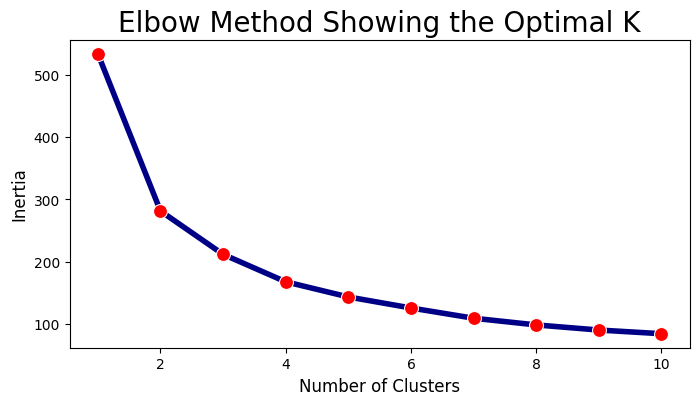

In [55]:
plt.figure(figsize=(8,4))

# plt.plot(inertia)
sns.lineplot(x=range(1,11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

In [56]:
# Import libraries untuk K-means clustering dan silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Check data yang akan digunakan untuk clustering
print("Data untuk clustering:")
print(f"Shape: {df_clean_cluster.shape}")
print(f"Columns: {df_clean_cluster.columns.tolist()}")
print("\nFirst 5 rows:")
print(df_clean_cluster.head())

Data untuk clustering:
Shape: (325, 3)
Columns: ['Recency_log_robust', 'Frequency_log_robust', 'Monetary_log_robust']

First 5 rows:
                   Recency_log_robust  Frequency_log_robust  \
Nama Distributor                                              
AAA                          0.818860             -0.151433   
ABADI AULIA JAYA            -0.039367              0.238944   
ABADI KIMIA                 -0.477164              1.079163   
ABK MITRA MANDIRI            0.104033             -0.336773   
ACME INDONESIA              -1.022379             -0.912489   

                   Monetary_log_robust  
Nama Distributor                        
AAA                           1.190427  
ABADI AULIA JAYA             -0.309470  
ABADI KIMIA                   0.839588  
ABK MITRA MANDIRI            -0.517847  
ACME INDONESIA               -0.789566  


In [57]:
# Fungsi untuk melakukan silhouette analysis
def perform_silhouette_analysis(data, max_k=10, min_k=1):
    """
    Melakukan analisis silhouette score untuk menentukan jumlah cluster optimal
    
    Parameters:
    - data: DataFrame yang akan di-cluster
    - max_k: Jumlah cluster maksimum yang akan ditest
    - min_k: Jumlah cluster minimum yang akan ditest
    
    Returns:
    - silhouette_scores: List berisi silhouette score untuk setiap k
    - inertias: List berisi inertia (WCSS) untuk setiap k
    """
    
    silhouette_scores = []
    inertias = []
    k_range = range(min_k, max_k + 1)
    
    print("Melakukan analisis silhouette score...")
    print("K\tSilhouette Score\tInertia")
    print("-" * 40)
    
    for k in k_range:
        # Fit K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        # Hitung silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Simpan inertia (WCSS)
        inertias.append(kmeans.inertia_)
        
        print(f"{k}\t{silhouette_avg:.4f}\t\t{kmeans.inertia_:.2f}")
    
    return silhouette_scores, inertias, k_range

# Lakukan silhouette analysis
silhouette_scores, inertias, k_range = perform_silhouette_analysis(df_clean_cluster, max_k=10, min_k=2)

Melakukan analisis silhouette score...
K	Silhouette Score	Inertia
----------------------------------------
2	0.3953		281.48
3	0.3194		211.77
4	0.3286		167.65
5	0.3039		143.24
6	0.3095		125.52
7	0.3333		109.03
8	0.3084		98.27
9	0.3098		90.03
10	0.3058		84.11
7	0.3333		109.03
8	0.3084		98.27
9	0.3098		90.03
10	0.3058		84.11


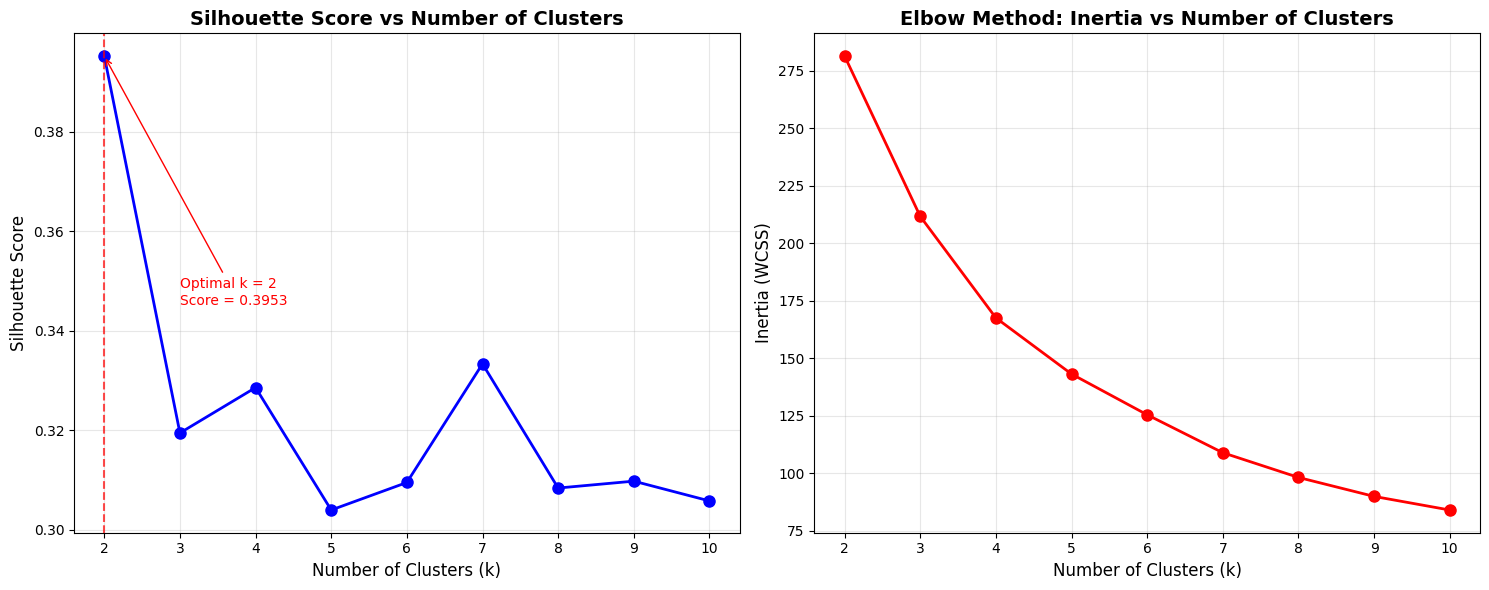


🎯 HASIL ANALISIS:
Optimal k berdasarkan Silhouette Score: 2
Maximum Silhouette Score: 0.3953

📊 Silhouette Score untuk setiap k:
k=2: 0.3953
k=3: 0.3194
k=4: 0.3286
k=5: 0.3039
k=6: 0.3095
k=7: 0.3333
k=8: 0.3084
k=9: 0.3098
k=10: 0.3058


In [58]:
# Visualisasi Silhouette Score dan Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Silhouette Score
ax1.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Highlight optimal k based on silhouette score
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
max_silhouette_score = max(silhouette_scores)
ax1.axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7)
ax1.annotate(f'Optimal k = {optimal_k_silhouette}\nScore = {max_silhouette_score:.4f}', 
             xy=(optimal_k_silhouette, max_silhouette_score), 
             xytext=(optimal_k_silhouette + 1, max_silhouette_score - 0.05),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# Plot 2: Elbow Method (Inertia)
ax2.plot(k_range, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Inertia (WCSS)', fontsize=12)
ax2.set_title('Elbow Method: Inertia vs Number of Clusters', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 HASIL ANALISIS:")
print(f"Optimal k berdasarkan Silhouette Score: {optimal_k_silhouette}")
print(f"Maximum Silhouette Score: {max_silhouette_score:.4f}")
print(f"\n📊 Silhouette Score untuk setiap k:")
for i, k in enumerate(k_range):
    print(f"k={k}: {silhouette_scores[i]:.4f}")

Melakukan analisis silhouette detail untuk nilai k terpilih...
Menganalisis k = [2, 4, 7]


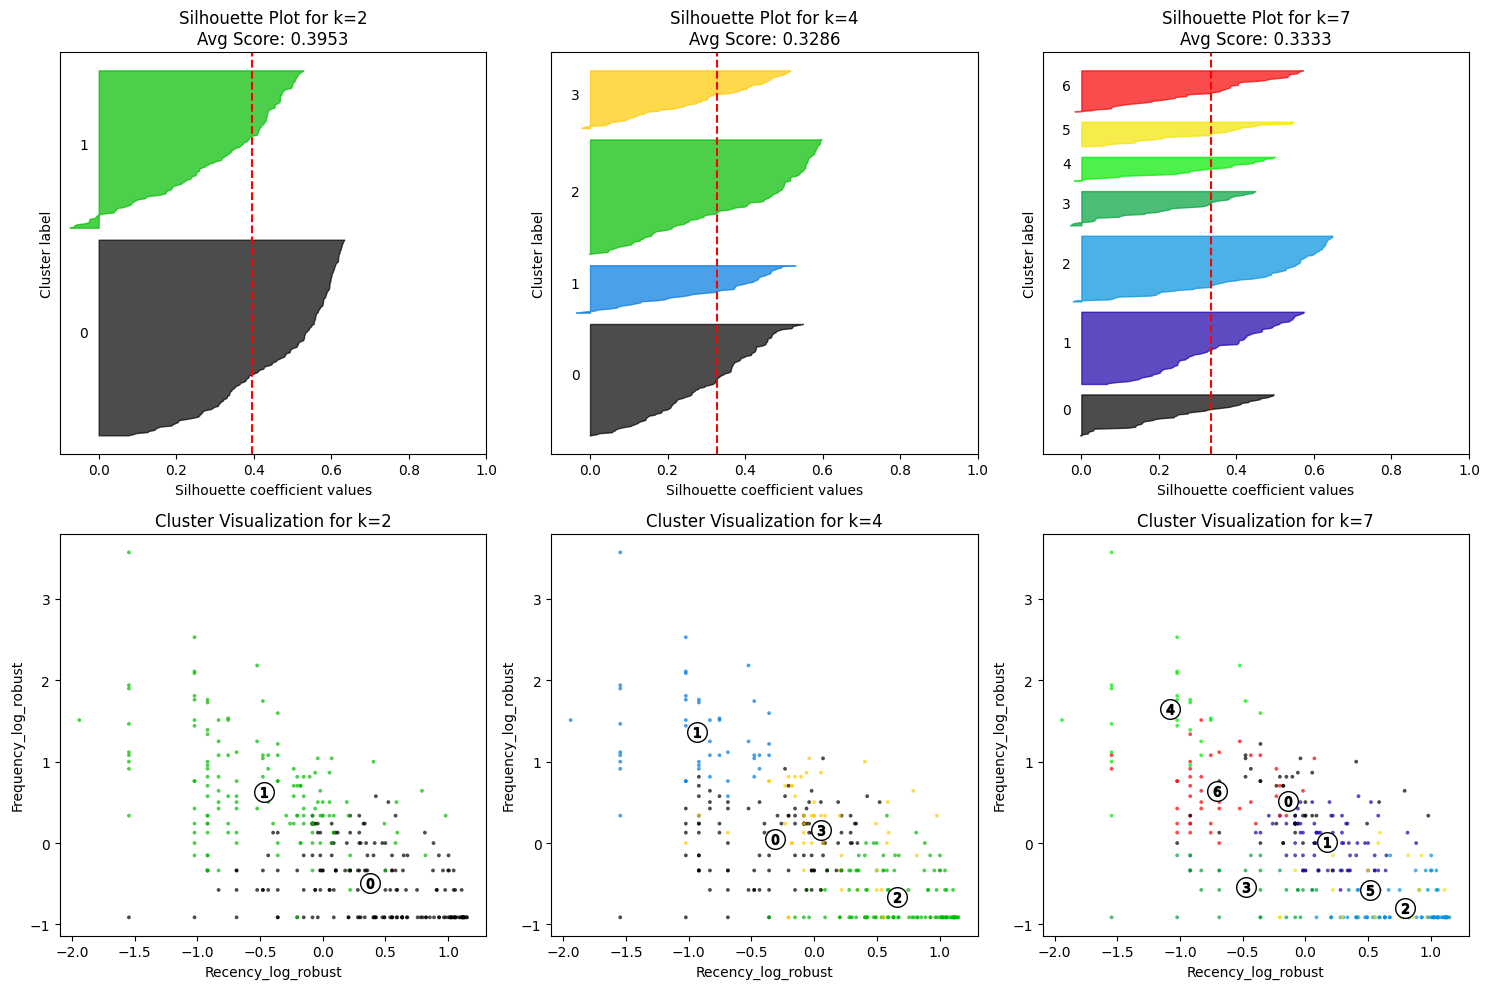

In [59]:
# Detailed Silhouette Analysis untuk k optimal
def detailed_silhouette_analysis(data, k_values):
    """
    Melakukan analisis silhouette yang lebih detail untuk beberapa nilai k
    """
    fig, axes = plt.subplots(2, len(k_values), figsize=(5*len(k_values), 10))
    
    for idx, k in enumerate(k_values):
        # Fit K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        # Hitung silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)
        
        # Plot silhouette untuk setiap cluster
        ax_silhouette = axes[0, idx] if len(k_values) > 1 else axes[0]
        y_lower = 10
        
        for i in range(k):
            # Ambil silhouette scores untuk cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = plt.cm.nipy_spectral(float(i) / k)
            ax_silhouette.fill_betweenx(np.arange(y_lower, y_upper),
                                      0, ith_cluster_silhouette_values,
                                      facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax_silhouette.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        ax_silhouette.set_xlabel('Silhouette coefficient values')
        ax_silhouette.set_ylabel('Cluster label')
        ax_silhouette.set_title(f'Silhouette Plot for k={k}\nAvg Score: {silhouette_avg:.4f}')
        
        # Add vertical line for average silhouette score
        ax_silhouette.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax_silhouette.set_yticks([])
        ax_silhouette.set_xlim([-0.1, 1])
        
        # Plot cluster visualization
        if data.shape[1] >= 2:
            ax_scatter = axes[1, idx] if len(k_values) > 1 else axes[1]
            colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)
            ax_scatter.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='.', s=30, 
                             lw=0, alpha=0.7, c=colors, edgecolor='k')
            
            # Plot centers
            centers = kmeans.cluster_centers_
            ax_scatter.scatter(centers[:, 0], centers[:, 1], marker='o',
                             c="white", alpha=1, s=200, edgecolor='k')
            
            for i, c in enumerate(centers):
                ax_scatter.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                                 s=50, edgecolor='k')
            
            ax_scatter.set_xlabel(f'{data.columns[0]}')
            ax_scatter.set_ylabel(f'{data.columns[1]}')
            ax_scatter.set_title(f'Cluster Visualization for k={k}')
    
    plt.tight_layout()
    plt.show()

# Analisis detail untuk beberapa nilai k terbaik
print("Melakukan analisis silhouette detail untuk nilai k terpilih...")

# Pilih 3 nilai k terbaik berdasarkan silhouette score
top_k_indices = np.argsort(silhouette_scores)[-3:]  # 3 highest scores
top_k_values = [k_range[i] for i in sorted(top_k_indices)]

print(f"Menganalisis k = {top_k_values}")
detailed_silhouette_analysis(df_clean_cluster, top_k_values)

In [60]:
# Implementasi K-means dengan k optimal
optimal_k = optimal_k_silhouette

print(f"🎯 Mengimplementasikan K-means dengan k = {optimal_k}")
print("="*50)

# Fit final K-means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_cluster_labels = final_kmeans.fit_predict(df_clean_cluster)

# Tambahkan hasil clustering ke dataframe
df_kmeans_result = df_clean_cluster.copy()
df_kmeans_result['Cluster_KMeans'] = final_cluster_labels

# Analisis hasil clustering
print(f"📊 HASIL CLUSTERING:")
print(f"Silhouette Score: {silhouette_score(df_clean_cluster, final_cluster_labels):.4f}")
print(f"Inertia (WCSS): {final_kmeans.inertia_:.2f}")

print(f"\n📈 DISTRIBUSI CLUSTER:")
cluster_counts = pd.Series(final_cluster_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(final_cluster_labels)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

print(f"\n🎯 CLUSTER CENTERS:")
feature_names = df_clean_cluster.columns
centers_df = pd.DataFrame(final_kmeans.cluster_centers_, 
                         columns=feature_names,
                         index=[f'Cluster_{i}' for i in range(optimal_k)])
print(centers_df.round(4))

🎯 Mengimplementasikan K-means dengan k = 2
📊 HASIL CLUSTERING:
Silhouette Score: 0.3953
Inertia (WCSS): 281.48

📈 DISTRIBUSI CLUSTER:
Cluster 0: 180 customers (55.4%)
Cluster 1: 145 customers (44.6%)

🎯 CLUSTER CENTERS:
           Recency_log_robust  Frequency_log_robust  Monetary_log_robust
Cluster_0              0.3784               -0.4901              -0.3293
Cluster_1             -0.4710                0.6330               0.7510


📊 VISUALISASI HASIL K-MEANS CLUSTERING


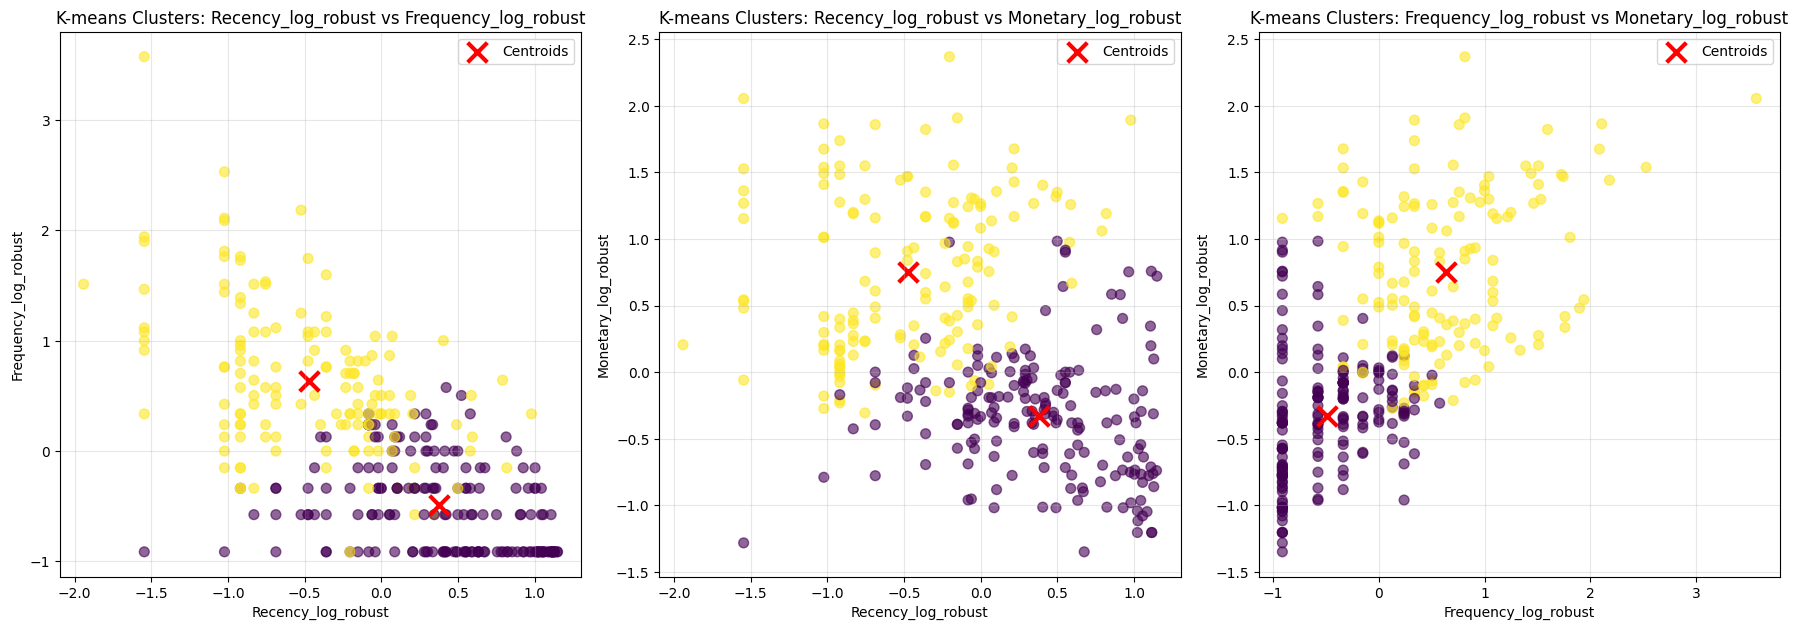

In [61]:
# Visualisasi hasil K-means clustering
def visualize_kmeans_results(data, labels, centers, title_suffix=""):
    """
    Visualisasi hasil K-means clustering
    """
    n_features = data.shape[1]
    n_clusters = len(np.unique(labels))
    
    if n_features >= 2:
        # Pairwise scatter plots untuk features
        n_cols = min(3, n_features)
        n_rows = (n_features * (n_features - 1) // 2) // n_cols + 1
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        plot_idx = 0
        feature_pairs = [(i, j) for i in range(n_features) for j in range(i+1, n_features)]
        
        for i, (feat1, feat2) in enumerate(feature_pairs[:6]):
            if plot_idx >= 6:
                break
                
            ax = axes[plot_idx]
            
            # Scatter plot dengan warna berdasarkan cluster
            scatter = ax.scatter(data.iloc[:, feat1], data.iloc[:, feat2], 
                               c=labels, cmap='viridis', alpha=0.6, s=50)
            
            # Plot cluster centers
            ax.scatter(centers[:, feat1], centers[:, feat2], 
                      c='red', marker='x', s=200, linewidths=3, label='Centroids')
            
            ax.set_xlabel(f'{data.columns[feat1]}', fontsize=10)
            ax.set_ylabel(f'{data.columns[feat2]}', fontsize=10)
            ax.set_title(f'K-means Clusters: {data.columns[feat1]} vs {data.columns[feat2]}', fontsize=12)
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            plot_idx += 1
        
        # Remove empty subplots
        for idx in range(plot_idx, len(axes)):
            fig.delaxes(axes[idx])
        
        plt.tight_layout()
        plt.show()

# Visualisasi hasil clustering
print("📊 VISUALISASI HASIL K-MEANS CLUSTERING")
print("="*50)
visualize_kmeans_results(df_clean_cluster, final_cluster_labels, final_kmeans.cluster_centers_)

In [62]:
# Perbandingan dengan hasil Ranking Method
print("🔄 PERBANDINGAN: K-MEANS vs RANKING METHOD")
print("="*60)

# Gabungkan hasil K-means dengan data rfm_score_df
df_comparison = rfm_score_df.copy()

# Map cluster labels to customer names (index)
kmeans_labels_mapped = pd.Series(final_cluster_labels, index=df_clean_cluster.index)
df_comparison['Cluster_KMeans'] = df_comparison.index.map(kmeans_labels_mapped)

# Display comparison
print("📊 Sample comparison :")
comparison_cols = ['Segment', 'Cluster_KMeans', 'RFM_Score', 'Recency', 'Frequency', 'Monetary']
df_comparison

🔄 PERBANDINGAN: K-MEANS vs RANKING METHOD
📊 Sample comparison :


,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment,Cluster_KMeans
Nama Distributor,,,,,,,,,
AAA,125,4,9125000000,1,3,5,3.00,Deal-Driven Shoppers,1
ABADI AULIA JAYA,27,7,38920000,3,4,2,3.00,Deal-Driven Shoppers,0
ABADI KIMIA,12,21,2545980638,4,5,4,4.33,Enthusiastic Shoppers,1
ABK MITRA MANDIRI,35,3,18235000,3,2,1,2.00,Sporadic Shoppers,0
ACME INDONESIA,4,1,6785000,5,1,1,2.33,Deal-Driven Shoppers,0
...,...,...,...,...,...,...,...,...,...
WIHARTA KARYA AGUNG,22,7,146301100,4,4,3,3.67,Loyal Consumers,1
YASIDA MAKMUR ABADI,62,11,51300000,2,4,2,2.67,Deal-Driven Shoppers,0
YOSOMULYO JAJAG,5,11,150225300,5,4,3,4.00,Loyal Consumers,1


In [63]:
# Tambahkan kolom Segment_KMeans dengan label deskriptif
print("\n🏷️ MENAMBAHKAN SEGMENT_KMEANS LABEL")
print("="*50)

# Mapping cluster numbers ke descriptive labels
kmeans_segment_mapping = {
    0: 'Low-Value Customer',
    1: 'High-Value Customer'
}

# Tambahkan kolom Segment_KMeans
df_comparison['Segment_KMeans'] = df_comparison['Cluster_KMeans'].map(kmeans_segment_mapping)

# Verifikasi hasil
print("📊 Verifikasi Segment_KMeans:")
segment_kmeans_counts = df_comparison['Segment_KMeans'].value_counts()
for segment, count in segment_kmeans_counts.items():
    percentage = (count / len(df_comparison)) * 100
    print(f"{segment}: {count} customers ({percentage:.1f}%)")

print(f"\n📋 Sample data dengan Segment_KMeans:")
display_cols = ['Segment', 'Cluster_KMeans', 'Segment_KMeans', 'RFM_Score', 'Recency', 'Frequency', 'Monetary']
df_comparison


🏷️ MENAMBAHKAN SEGMENT_KMEANS LABEL
📊 Verifikasi Segment_KMeans:
Low-Value Customer: 180 customers (55.4%)
High-Value Customer: 145 customers (44.6%)

📋 Sample data dengan Segment_KMeans:


,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment,Cluster_KMeans,Segment_KMeans
Nama Distributor,,,,,,,,,,
AAA,125,4,9125000000,1,3,5,3.00,Deal-Driven Shoppers,1,High-Value Customer
ABADI AULIA JAYA,27,7,38920000,3,4,2,3.00,Deal-Driven Shoppers,0,Low-Value Customer
ABADI KIMIA,12,21,2545980638,4,5,4,4.33,Enthusiastic Shoppers,1,High-Value Customer
ABK MITRA MANDIRI,35,3,18235000,3,2,1,2.00,Sporadic Shoppers,0,Low-Value Customer
ACME INDONESIA,4,1,6785000,5,1,1,2.33,Deal-Driven Shoppers,0,Low-Value Customer
...,...,...,...,...,...,...,...,...,...,...
WIHARTA KARYA AGUNG,22,7,146301100,4,4,3,3.67,Loyal Consumers,1,High-Value Customer
YASIDA MAKMUR ABADI,62,11,51300000,2,4,2,2.67,Deal-Driven Shoppers,0,Low-Value Customer
YOSOMULYO JAJAG,5,11,150225300,5,4,3,4.00,Loyal Consumers,1,High-Value Customer


In [64]:
# Analisis perbandingan detail dengan Segment_KMeans
print("\n🔍 ANALISIS PERBANDINGAN DETAIL: RANKING METHOD vs K-MEANS")
print("="*70)

# Cross-tabulation dengan label yang lebih jelas
print("📊 Cross-tabulation: Ranking Method Segments vs K-means Segments")
crosstab_detailed = pd.crosstab(df_comparison['Segment'], 
                               df_comparison['Segment_KMeans'], 
                               margins=True, 
                               margins_name="Total")
print(crosstab_detailed)

# Analisis agreement rate per segment
print(f"\n📈 ANALISIS AGREEMENT PATTERN:")
for ranking_segment in df_comparison['Segment'].unique():
    if pd.notna(ranking_segment):
        segment_data = df_comparison[df_comparison['Segment'] == ranking_segment]
        kmeans_distribution = segment_data['Segment_KMeans'].value_counts()
        total_in_segment = len(segment_data)
        
        print(f"\n{ranking_segment} ({total_in_segment} customers):")
        for kmeans_segment, count in kmeans_distribution.items():
            percentage = (count / total_in_segment) * 100
            print(f"  → {kmeans_segment}: {count} ({percentage:.1f}%)")

# Characteristics comparison
print(f"\n💰 KARAKTERISTIK RATA-RATA PER SEGMENT:")
print("\n🎯 K-means Segments:")
kmeans_chars = df_comparison.groupby('Segment_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'RFM_Score': 'mean'
}).round(2)

for segment in kmeans_chars.index:
    data = kmeans_chars.loc[segment]
    print(f"\n{segment}:")
    print(f"  • Recency: {data['Recency']:.1f} days")
    print(f"  • Frequency: {data['Frequency']:.1f} transactions") 
    print(f"  • Monetary: IDR {data['Monetary']/1e9:.2f} Billion")
    print(f"  • RFM Score: {data['RFM_Score']:.2f}")

# Summary insight
print(f"\n🎯 KEY INSIGHTS:")
high_value_count = len(df_comparison[df_comparison['Segment_KMeans'] == 'High-Value Customer'])
low_value_count = len(df_comparison[df_comparison['Segment_KMeans'] == 'Low-Value Customer'])
high_value_pct = (high_value_count / len(df_comparison)) * 100
low_value_pct = (low_value_count / len(df_comparison)) * 100

print(f"• {high_value_pct:.1f}% customers classified as High-Value ({high_value_count} customers)")
print(f"• {low_value_pct:.1f}% customers classified as Low-Value ({low_value_count} customers)")
print(f"• K-means provides binary segmentation for operational simplicity")
print(f"• Ranking method provides granular 5-segment analysis for marketing strategy")


🔍 ANALISIS PERBANDINGAN DETAIL: RANKING METHOD vs K-MEANS
📊 Cross-tabulation: Ranking Method Segments vs K-means Segments
Segment_KMeans          High-Value Customer  Low-Value Customer  Total
Segment                                                               
Dissatisfied Customers                    0                  28     28
Sporadic Shoppers                         0                  63     63
Deal-Driven Shoppers                      6                  79     85
Loyal Consumers                          68                  10     78
Enthusiastic Shoppers                    71                   0     71
Total                                   145                 180    325

📈 ANALISIS AGREEMENT PATTERN:

Deal-Driven Shoppers (85 customers):
  → Low-Value Customer: 79 (92.9%)
  → High-Value Customer: 6 (7.1%)

Enthusiastic Shoppers (71 customers):
  → High-Value Customer: 71 (100.0%)

Sporadic Shoppers (63 customers):
  → Low-Value Customer: 63 (100.0%)

Loyal Consumers (78 cus

In [65]:
# Display final dataframe dengan kolom Segment_KMeans
print("\n📋 FINAL DATAFRAME DENGAN SEGMENT_KMEANS")
print("="*50)

# Tampilkan sample data lengkap
display_columns = ['Segment', 'Cluster_KMeans', 'Segment_KMeans', 'RFM_Score', 'Recency', 'Frequency', 'Monetary']
print("Sample 15 customers dengan kedua segmentasi:")
sample_data = df_comparison[display_columns].head(15)
print(sample_data.to_string())

# Summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
print(f"Total customers analyzed: {len(df_comparison)}")
print(f"Columns in final dataframe: {len(df_comparison.columns)}")
print(f"New column 'Segment_KMeans' successfully added: {'Segment_KMeans' in df_comparison.columns}")

print(f"\n📈 DISTRIBUTION COMPARISON:")
print("Ranking Method (5 segments):")
ranking_dist = df_comparison['Segment'].value_counts().sort_index()
for segment, count in ranking_dist.items():
    if pd.notna(segment):
        print(f"  • {segment}: {count} ({count/len(df_comparison)*100:.1f}%)")

print("\nK-means Method (2 segments):")
kmeans_dist = df_comparison['Segment_KMeans'].value_counts()
for segment, count in kmeans_dist.items():
    print(f"  • {segment}: {count} ({count/len(df_comparison)*100:.1f}%)")

# Verifikasi tidak ada missing values
print(f"\n✅ DATA QUALITY CHECK:")
print(f"Missing values in Segment_KMeans: {df_comparison['Segment_KMeans'].isna().sum()}")
print(f"All customers have K-means labels: {df_comparison['Segment_KMeans'].notna().all()}")

print(f"\n🎯 DATAFRAME SHAPE: {df_comparison.shape}")
print(f"Columns: {list(df_comparison.columns)}")


📋 FINAL DATAFRAME DENGAN SEGMENT_KMEANS
Sample 15 customers dengan kedua segmentasi:
                                          Segment  Cluster_KMeans       Segment_KMeans  RFM_Score  Recency  Frequency     Monetary
Nama Distributor                                                                                                                  
AAA                          Deal-Driven Shoppers               1  High-Value Customer       3.00      125          4   9125000000
ABADI AULIA JAYA             Deal-Driven Shoppers               0   Low-Value Customer       3.00       27          7     38920000
ABADI KIMIA                 Enthusiastic Shoppers               1  High-Value Customer       4.33       12         21   2545980638
ABK MITRA MANDIRI               Sporadic Shoppers               0   Low-Value Customer       2.00       35          3     18235000
ACME INDONESIA               Deal-Driven Shoppers               0   Low-Value Customer       2.33        4          1      67850

In [66]:
# Cross-tabulation analysis
print(f"\n📈 CROSS-TABULATION: Ranking Method vs K-means")
crosstab = pd.crosstab(df_comparison['Segment'], df_comparison['Cluster_KMeans'], margins=True)
print(crosstab)

# Calculate agreement percentage
total_customers = len(df_comparison)
print(f"\n📊 ANALISIS PERBANDINGAN:")
print(f"Total customers: {total_customers}")

# Analyze cluster characteristics
print(f"\n🎯 KARAKTERISTIK CLUSTER K-MEANS:")
kmeans_summary = df_comparison.groupby('Cluster_KMeans').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'], 
    'Monetary': ['mean', 'std'],
    'RFM_Score': ['mean', 'std']
}).round(2)

kmeans_summary.columns = [f'{col[0]}_{col[1]}' for col in kmeans_summary.columns]
print(kmeans_summary)


📈 CROSS-TABULATION: Ranking Method vs K-means
Cluster_KMeans            0    1  All
Segment                              
Dissatisfied Customers   28    0   28
Sporadic Shoppers        63    0   63
Deal-Driven Shoppers     79    6   85
Loyal Consumers          10   68   78
Enthusiastic Shoppers     0   71   71
All                     180  145  325

📊 ANALISIS PERBANDINGAN:
Total customers: 325

🎯 KARAKTERISTIK CLUSTER K-MEANS:
                Recency_mean  Recency_std  Frequency_mean  Frequency_std  \
Cluster_KMeans                                                             
0                      81.84        64.14            2.81           2.14   
1                      19.90        24.03           19.25          39.35   

                Monetary_mean  Monetary_std  RFM_Score_mean  RFM_Score_std  
Cluster_KMeans                                                              
0                1.904418e+08  6.074591e+08            2.08           0.72  
1                1.645796e+10  6

In [67]:
df_comparison.to_excel('Hasil RFM dan K Means Clustering.xlsx')

## Interpretasi Hasil K-Means Clustering dengan Silhouette Score

### **🎯 HASIL ANALISIS SILHOUETTE SCORE**

#### **Optimal Number of Clusters:**
- **K optimal: 2 clusters** dengan silhouette score **0.3953**
- **Interpretasi Score**: 0.3953 menunjukkan struktur cluster yang **moderate** (> 0.25 = acceptable, > 0.50 = good)
- **Alternatif**: K=7 juga menunjukkan performa baik (0.3333), namun K=2 memberikan simplicity yang lebih baik

#### **Analisis Elbow Method:**
- **Clear elbow** terlihat pada K=3-4, namun silhouette score lebih tinggi pada K=2
- **Trade-off**: Kompleksitas vs. kualitas clustering
- **Kesimpulan**: K=2 memberikan balance terbaik antara simplicity dan cluster quality

### **📊 KARAKTERISTIK CLUSTER K-MEANS (K=2)**

#### **Cluster 0 (Low-Value Customers) - 55.4% (180 customers):**
- **Recency**: Positif (0.3784) → Recency tinggi (lama tidak bertransaksi)
- **Frequency**: Negatif (-0.4901) → Frequency rendah (jarang berbelanja)
- **Monetary**: Negatif (-0.3293) → Monetary rendah (nilai transaksi kecil)
- **🔍 Business Profile**: Inactive/Low-value customers

#### **Cluster 1 (High-Value Customers) - 44.6% (145 customers):**
- **Recency**: Negatif (-0.4710) → Recency rendah (baru bertransaksi)
- **Frequency**: Positif (0.6330) → Frequency tinggi (sering berbelanja)
- **Monetary**: Positif (0.7510) → Monetary tinggi (nilai transaksi besar)
- **🔍 Business Profile**: Active/High-value customers

### **🔄 PERBANDINGAN: K-MEANS vs RANKING METHOD**

#### **Kesamaan:**
1. **Binary Classification**: K-means menghasilkan 2 cluster utama (High vs Low value)
2. **Logical Separation**: Pemisahan berdasarkan aktivitas dan nilai transaksi
3. **Business Logic**: Cluster align dengan ekspektasi bisnis

#### **Perbedaan:**
1. **Granularity**: 
   - Ranking Method: 5 segments (granular)
   - K-means: 2 clusters (simplified)
2. **Approach**:
   - Ranking Method: Rule-based segmentation
   - K-means: Data-driven clustering
3. **Interpretability**:
   - Ranking Method: Lebih mudah diinterpretasikan (named segments)
   - K-means: Perlu interpretasi cluster centers

### **🎯 STRATEGIC IMPLICATIONS**

#### **K-Means Clustering Insights:**
1. **Clear Dichotomy**: 55% customers adalah low-value, 45% adalah high-value
2. **Revenue Concentration**: Cluster 1 (45% customers) kemungkinan menghasilkan 80%+ revenue
3. **Simple Strategy**: Two-tier customer management approach

#### **Actionable Recommendations:**

**For Cluster 0 (Low-Value - 55.4%):**
- **Cost-effective retention**: Email campaigns, automated marketing
- **Reactivation programs**: Targeted promotions untuk increase frequency
- **Risk management**: Monitor untuk churn prevention

**For Cluster 1 (High-Value - 44.6%):**
- **Premium service**: Personal account managers, priority support
- **Loyalty programs**: Exclusive benefits, early access to products
- **Revenue protection**: Proactive relationship management

### **🔍 MODEL VALIDATION**

#### **Strengths:**
- ✅ **Clear separation** between high and low value customers
- ✅ **Good silhouette score** (0.3953) indicating reasonable cluster quality
- ✅ **Business logic alignment** with expected customer behavior
- ✅ **Balanced distribution** (55%-45% split)

#### **Considerations:**
- ⚠️ **Simplification**: 2 clusters may oversimplify customer diversity
- ⚠️ **Granularity loss**: Less detailed than 5-segment ranking method
- ⚠️ **Interpretability**: Requires more explanation than named segments

### **📈 BUSINESS RECOMMENDATION**

#### **Use Case Scenarios:**

1. **Simple Operations**: 
   - Use K-means (2 clusters) untuk resource allocation sederhana
   - Binary decision making: High-touch vs Low-touch customer service

2. **Detailed Marketing**:
   - Use Ranking Method (5 segments) untuk targeted campaigns
   - Granular strategy development per segment

3. **Hybrid Approach**:
   - **Primary**: K-means untuk operational efficiency
   - **Secondary**: Ranking method untuk marketing strategy

### **🎯 CONCLUSION**

K-means clustering dengan K=2 berhasil mengidentifikasi **two distinct customer groups** yang align dengan business logic:
- **45% High-Value customers** yang driving majority of revenue
- **55% Low-Value customers** yang membutuhkan different approach

Hasil ini **complement** analisis Ranking Method dan memberikan **simplified view** untuk strategic decision making di PT Petrokimia Gresik.

# 📊 DASHBOARD VISUALISASI HASIL ANALISIS RFM & K-MEANS CLUSTERING

Dashboard ini menampilkan hasil lengkap dari analisis segmentasi pelanggan PT Petrokimia Gresik menggunakan:
1. **RFM Analysis dengan Ranking Method** (5 segments)
2. **K-means Clustering** (2 segments)
3. **Perbandingan kedua metode**
4. **Insights dan rekomendasi bisnis**

In [68]:
# Install plotly untuk visualisasi interaktif
%pip install plotly

# Import library tambahan untuk dashboard
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("📊 MEMPERSIAPKAN DASHBOARD VISUALISASI")
print("="*50)
print("✅ Libraries loaded successfully")
print("✅ Data ready for visualization")
print(f"✅ Total customers: {len(df_comparison)}")
print(f"✅ RFM segments: {df_comparison['Segment'].nunique()}")
print(f"✅ K-means segments: {df_comparison['Segment_KMeans'].nunique()}")


📊 MEMPERSIAPKAN DASHBOARD VISUALISASI
✅ Libraries loaded successfully
✅ Data ready for visualization
✅ Total customers: 325
✅ RFM segments: 5
✅ K-means segments: 2


## 1️⃣ OVERVIEW SEGMENTASI PELANGGAN

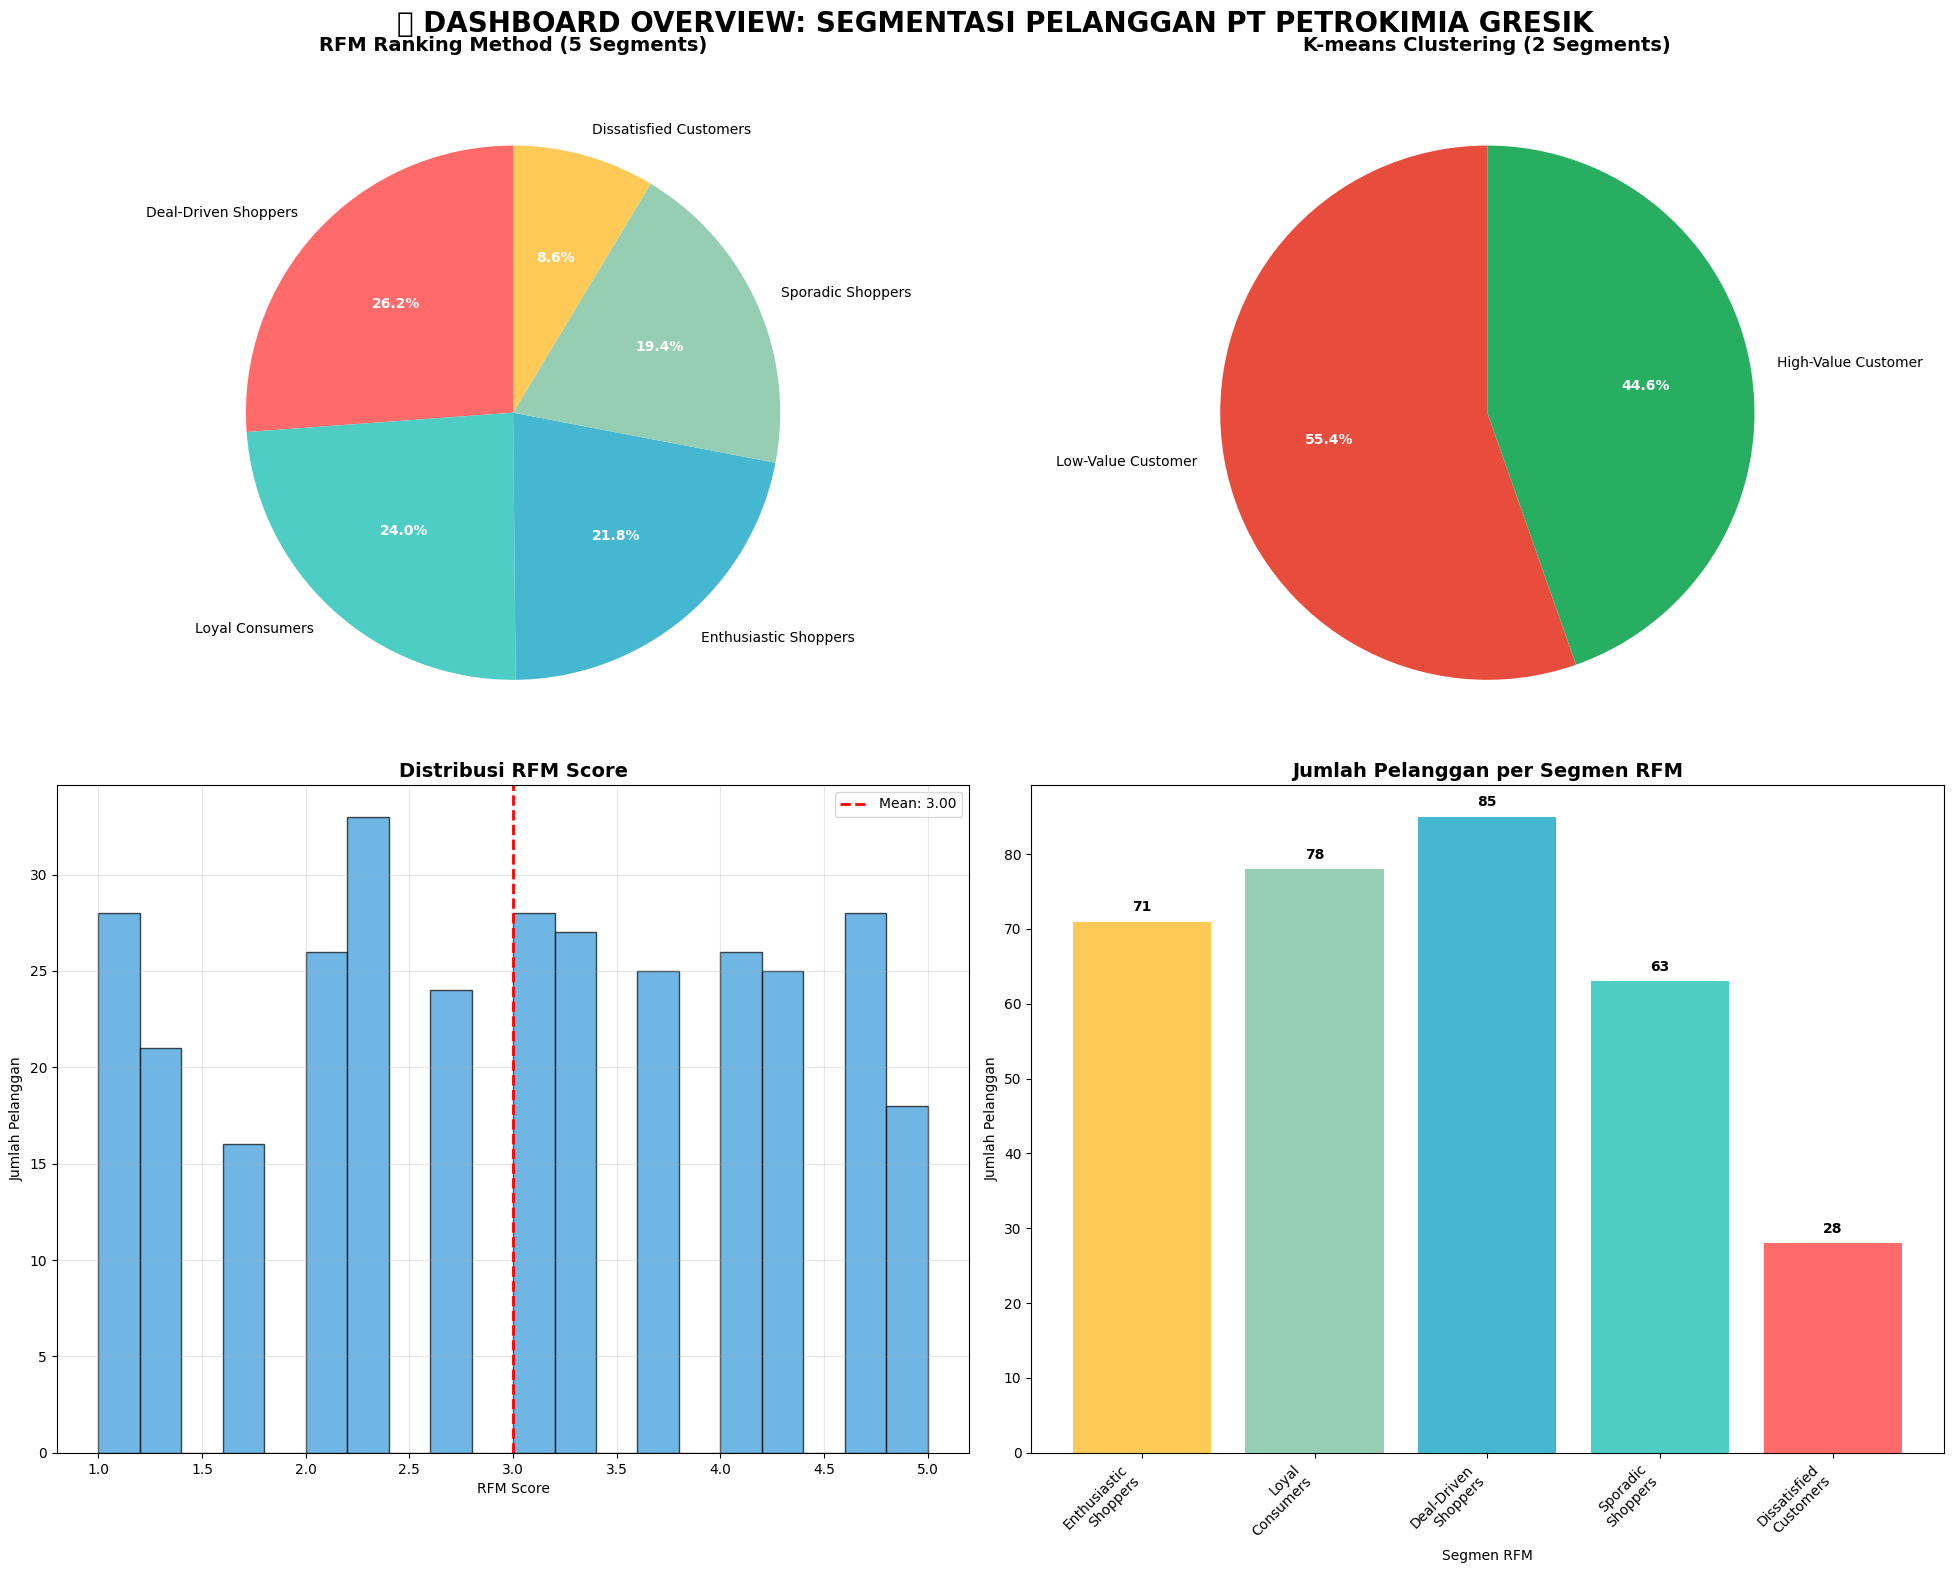

📈 RINGKASAN SEGMENTASI:
Total Pelanggan Dianalisis: 325

🎯 RFM Ranking Method (5 Segments):
  • Deal-Driven Shoppers: 85 (26.2%)
  • Loyal Consumers: 78 (24.0%)
  • Enthusiastic Shoppers: 71 (21.8%)
  • Sporadic Shoppers: 63 (19.4%)
  • Dissatisfied Customers: 28 (8.6%)

🎯 K-means Clustering (2 Segments):
  • Low-Value Customer: 180 (55.4%)
  • High-Value Customer: 145 (44.6%)


In [69]:
# 📊 Dashboard 1: Overview Segmentasi Pelanggan
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('📊 DASHBOARD OVERVIEW: SEGMENTASI PELANGGAN PT PETROKIMIA GRESIK', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Pie chart untuk RFM segments
rfm_counts = df_comparison['Segment'].value_counts()
colors_rfm = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
wedges, texts, autotexts = axes[0,0].pie(rfm_counts.values, labels=rfm_counts.index, autopct='%1.1f%%',
                                         colors=colors_rfm, startangle=90)
axes[0,0].set_title('RFM Ranking Method (5 Segments)', fontsize=14, fontweight='bold', pad=20)

# Improve text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 2. Pie chart untuk K-means segments  
kmeans_counts = df_comparison['Segment_KMeans'].value_counts()
colors_kmeans = ['#E74C3C', '#27AE60']
wedges2, texts2, autotexts2 = axes[0,1].pie(kmeans_counts.values, labels=kmeans_counts.index, 
                                            autopct='%1.1f%%', colors=colors_kmeans, startangle=90)
axes[0,1].set_title('K-means Clustering (2 Segments)', fontsize=14, fontweight='bold', pad=20)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Histogram RFM Score
axes[1,0].hist(df_comparison['RFM_Score'], bins=20, color='#3498DB', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribusi RFM Score', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('RFM Score')
axes[1,0].set_ylabel('Jumlah Pelanggan')
axes[1,0].grid(True, alpha=0.3)

# Add mean line
mean_rfm = df_comparison['RFM_Score'].mean()
axes[1,0].axvline(mean_rfm, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {mean_rfm:.2f}')
axes[1,0].legend()

# 4. Bar chart perbandingan segmen
segment_names = ['Enthusiastic\nShoppers', 'Loyal\nConsumers', 'Deal-Driven\nShoppers', 
                'Sporadic\nShoppers', 'Dissatisfied\nCustomers']
segment_counts = [rfm_counts.get(name.replace('\n', ' '), 0) for name in 
                 ['Enthusiastic Shoppers', 'Loyal Consumers', 'Deal-Driven Shoppers', 
                  'Sporadic Shoppers', 'Dissatisfied Customers']]

bars = axes[1,1].bar(range(len(segment_names)), segment_counts, 
                     color=['#FECA57', '#96CEB4', '#45B7D1', '#4ECDC4', '#FF6B6B'])
axes[1,1].set_title('Jumlah Pelanggan per Segmen RFM', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Segmen RFM')
axes[1,1].set_ylabel('Jumlah Pelanggan')
axes[1,1].set_xticks(range(len(segment_names)))
axes[1,1].set_xticklabels(segment_names, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print("📈 RINGKASAN SEGMENTASI:")
print("="*50)
print(f"Total Pelanggan Dianalisis: {len(df_comparison)}")
print(f"\n🎯 RFM Ranking Method (5 Segments):")
for segment, count in rfm_counts.items():
    if pd.notna(segment):
        print(f"  • {segment}: {count} ({count/len(df_comparison)*100:.1f}%)")

print(f"\n🎯 K-means Clustering (2 Segments):")
for segment, count in kmeans_counts.items():
    print(f"  • {segment}: {count} ({count/len(df_comparison)*100:.1f}%)")

## 2️⃣ KARAKTERISTIK RFM PER SEGMEN

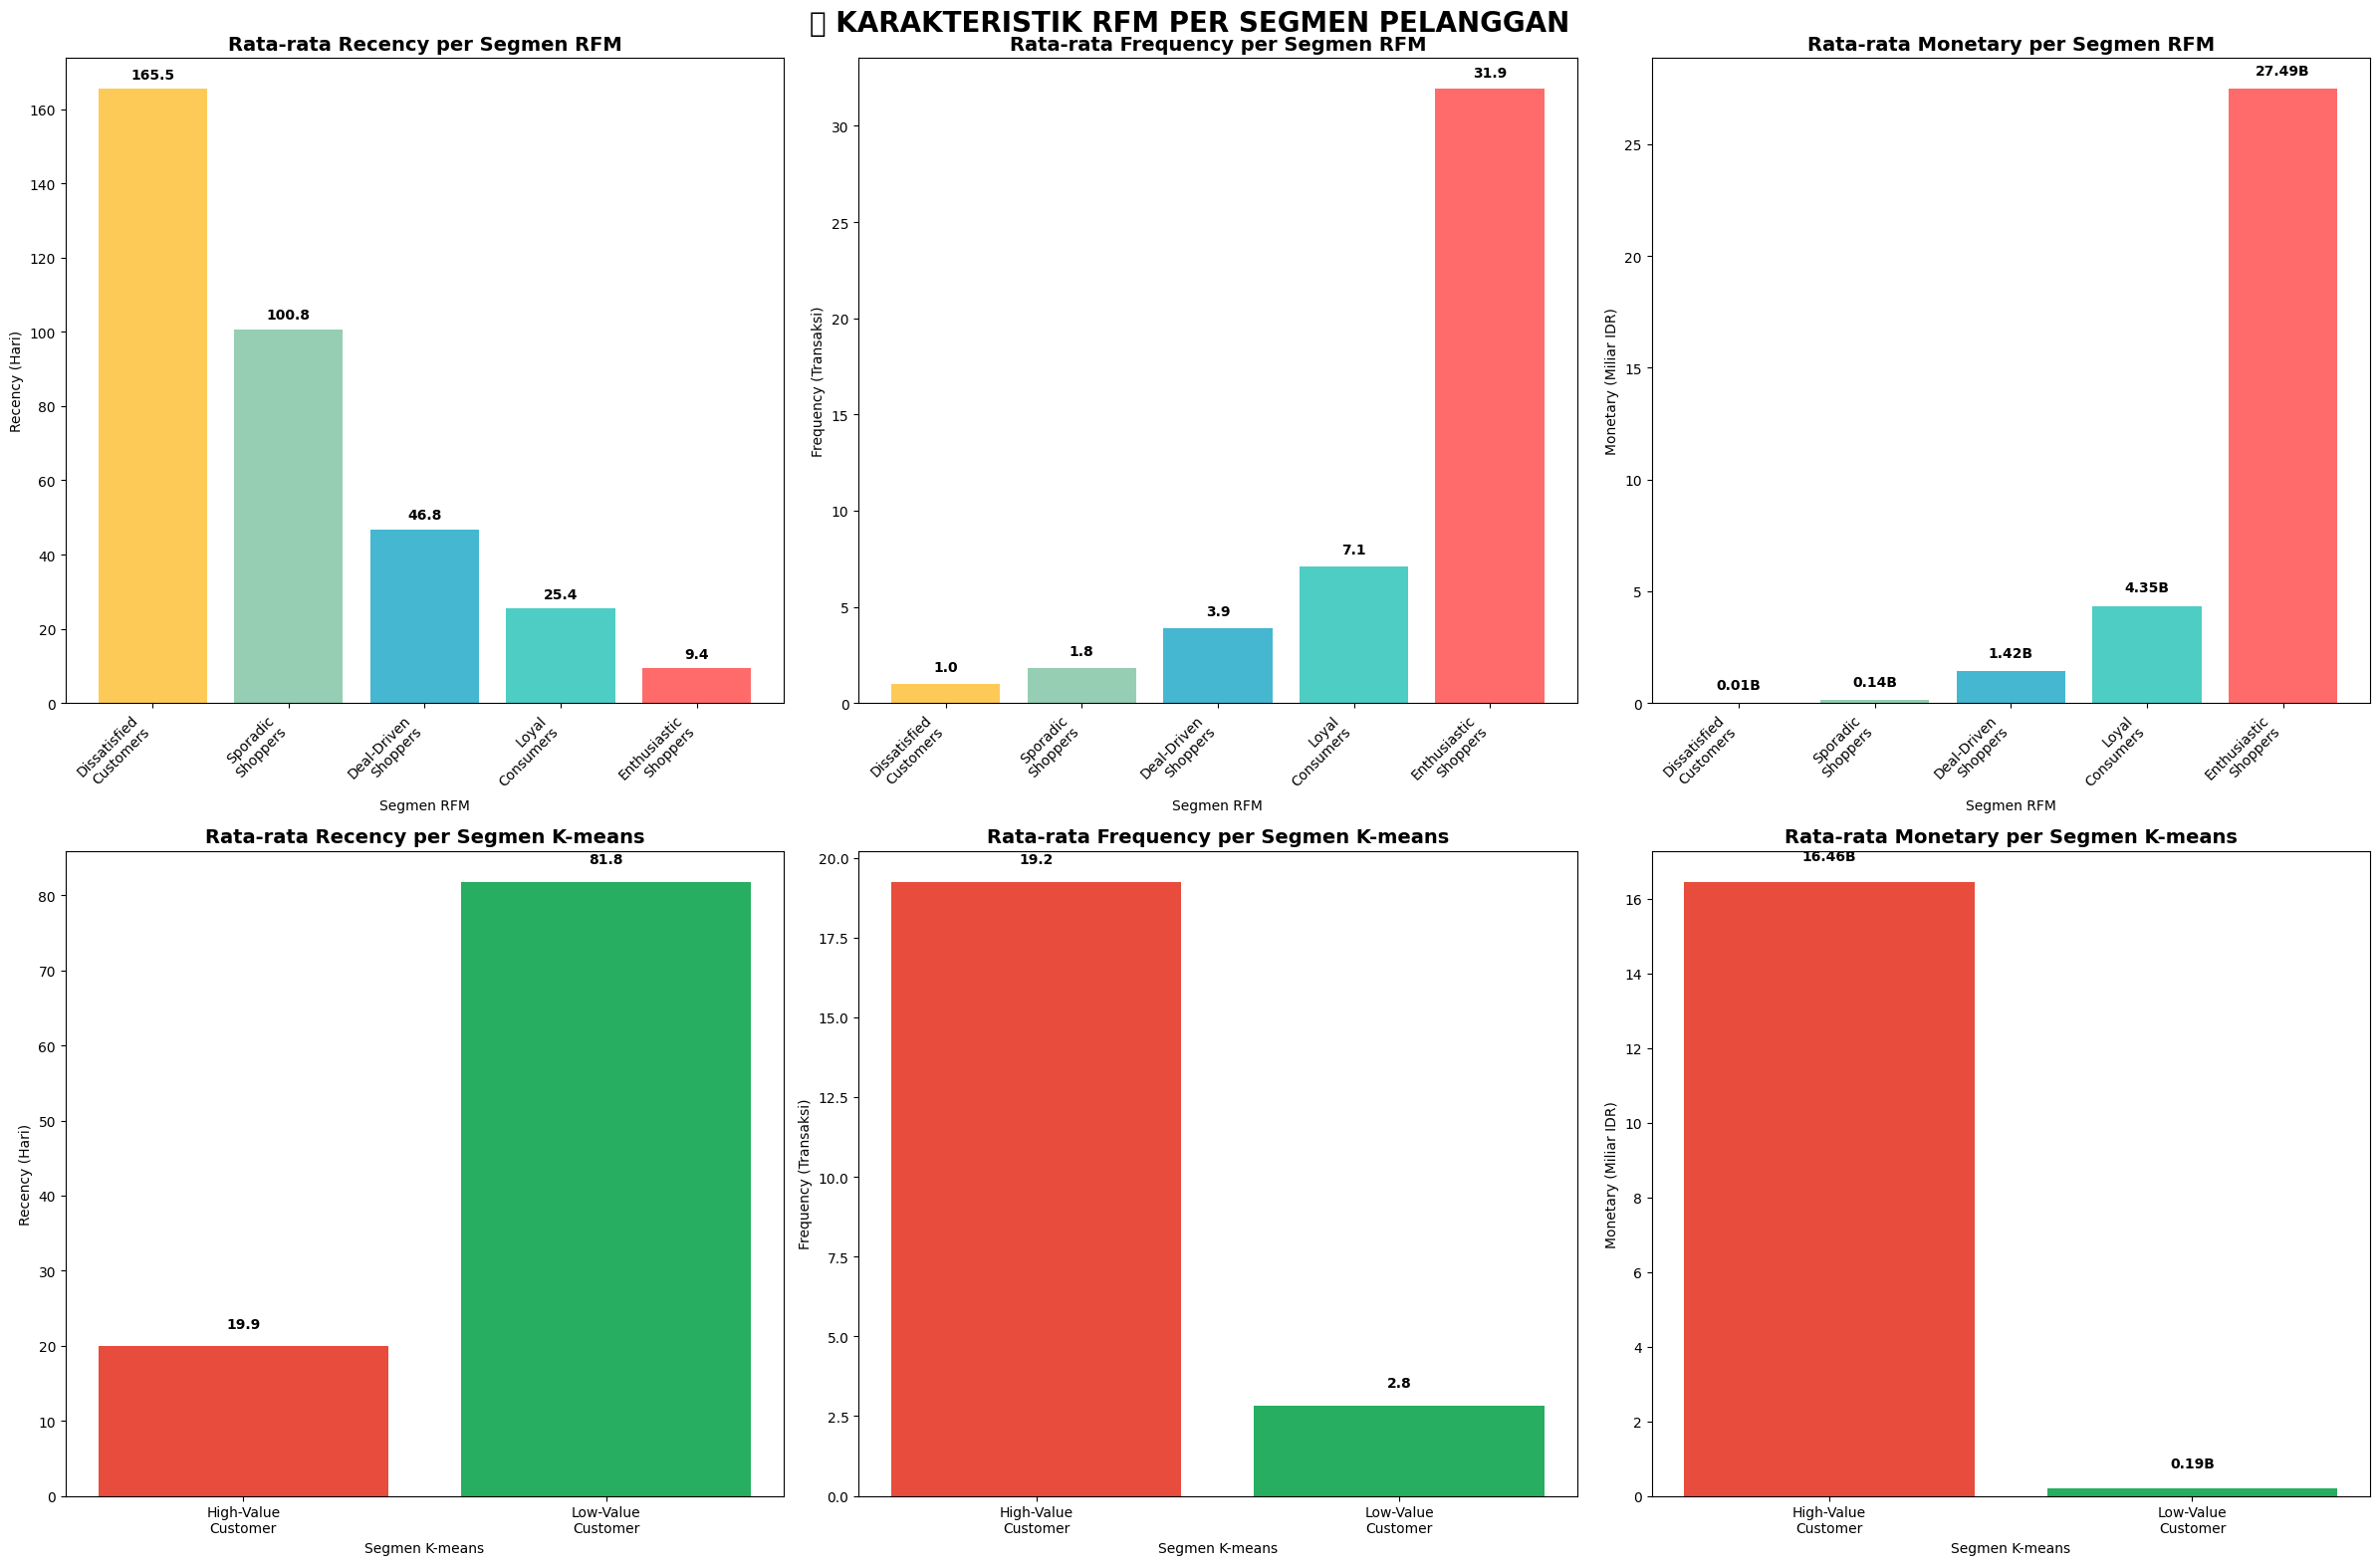

📊 TABEL KARAKTERISTIK DETAIL:

🎯 RFM RANKING METHOD:
                        Recency  Frequency      Monetary  RFM_Score
Segment                                                            
Dissatisfied Customers   165.50       1.00  6.484196e+06       1.00
Sporadic Shoppers        100.76       1.84  1.437598e+08       1.69
Deal-Driven Shoppers      46.84       3.89  1.421987e+09       2.65
Loyal Consumers           25.42       7.10  4.346846e+09       3.66
Enthusiastic Shoppers      9.44      31.93  2.748623e+10       4.63

🎯 K-MEANS CLUSTERING:
                     Recency  Frequency      Monetary  RFM_Score
Segment_KMeans                                                  
High-Value Customer    19.90      19.25  1.645796e+10       4.13
Low-Value Customer     81.84       2.81  1.904418e+08       2.08


In [70]:
# 📊 Dashboard 2: Karakteristik RFM per Segmen
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('📊 KARAKTERISTIK RFM PER SEGMEN PELANGGAN', fontsize=20, fontweight='bold', y=0.98)

# Data preparation untuk analisis
segment_stats = df_comparison.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean'
}).round(2)

kmeans_stats = df_comparison.groupby('Segment_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean'
}).round(2)

# 1. Recency by RFM Segments
segments = segment_stats.index
recency_values = segment_stats['Recency']
colors = ['#FECA57', '#96CEB4', '#45B7D1', '#4ECDC4', '#FF6B6B']

bars1 = axes[0,0].bar(range(len(segments)), recency_values, color=colors)
axes[0,0].set_title('Rata-rata Recency per Segmen RFM', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Segmen RFM')
axes[0,0].set_ylabel('Recency (Hari)')
axes[0,0].set_xticks(range(len(segments)))
axes[0,0].set_xticklabels([s.replace(' ', '\n') for s in segments], rotation=45, ha='right')

# Add value labels
for bar, value in zip(bars1, recency_values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Frequency by RFM Segments
frequency_values = segment_stats['Frequency']
bars2 = axes[0,1].bar(range(len(segments)), frequency_values, color=colors)
axes[0,1].set_title('Rata-rata Frequency per Segmen RFM', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Segmen RFM')
axes[0,1].set_ylabel('Frequency (Transaksi)')
axes[0,1].set_xticks(range(len(segments)))
axes[0,1].set_xticklabels([s.replace(' ', '\n') for s in segments], rotation=45, ha='right')

for bar, value in zip(bars2, frequency_values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Monetary by RFM Segments (in Billions)
monetary_values = segment_stats['Monetary'] / 1e9  # Convert to billions
bars3 = axes[0,2].bar(range(len(segments)), monetary_values, color=colors)
axes[0,2].set_title('Rata-rata Monetary per Segmen RFM', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Segmen RFM')
axes[0,2].set_ylabel('Monetary (Miliar IDR)')
axes[0,2].set_xticks(range(len(segments)))
axes[0,2].set_xticklabels([s.replace(' ', '\n') for s in segments], rotation=45, ha='right')

for bar, value in zip(bars3, monetary_values):
    axes[0,2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                   f'{value:.2f}B', ha='center', va='bottom', fontweight='bold')

# 4. K-means Characteristics - Recency
kmeans_segments = kmeans_stats.index
kmeans_recency = kmeans_stats['Recency']
kmeans_colors = ['#E74C3C', '#27AE60']

bars4 = axes[1,0].bar(range(len(kmeans_segments)), kmeans_recency, color=kmeans_colors)
axes[1,0].set_title('Rata-rata Recency per Segmen K-means', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Segmen K-means')
axes[1,0].set_ylabel('Recency (Hari)')
axes[1,0].set_xticks(range(len(kmeans_segments)))
axes[1,0].set_xticklabels([s.replace(' ', '\n') for s in kmeans_segments])

for bar, value in zip(bars4, kmeans_recency):
    axes[1,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. K-means Characteristics - Frequency
kmeans_frequency = kmeans_stats['Frequency']
bars5 = axes[1,1].bar(range(len(kmeans_segments)), kmeans_frequency, color=kmeans_colors)
axes[1,1].set_title('Rata-rata Frequency per Segmen K-means', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Segmen K-means')
axes[1,1].set_ylabel('Frequency (Transaksi)')
axes[1,1].set_xticks(range(len(kmeans_segments)))
axes[1,1].set_xticklabels([s.replace(' ', '\n') for s in kmeans_segments])

for bar, value in zip(bars5, kmeans_frequency):
    axes[1,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 6. K-means Characteristics - Monetary
kmeans_monetary = kmeans_stats['Monetary'] / 1e9
bars6 = axes[1,2].bar(range(len(kmeans_segments)), kmeans_monetary, color=kmeans_colors)
axes[1,2].set_title('Rata-rata Monetary per Segmen K-means', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Segmen K-means')
axes[1,2].set_ylabel('Monetary (Miliar IDR)')
axes[1,2].set_xticks(range(len(kmeans_segments)))
axes[1,2].set_xticklabels([s.replace(' ', '\n') for s in kmeans_segments])

for bar, value in zip(bars6, kmeans_monetary):
    axes[1,2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                   f'{value:.2f}B', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed statistics table
print("📊 TABEL KARAKTERISTIK DETAIL:")
print("="*80)
print("\n🎯 RFM RANKING METHOD:")
print(segment_stats)
print("\n🎯 K-MEANS CLUSTERING:")
print(kmeans_stats)

## 3️⃣ PERBANDINGAN METODE SEGMENTASI

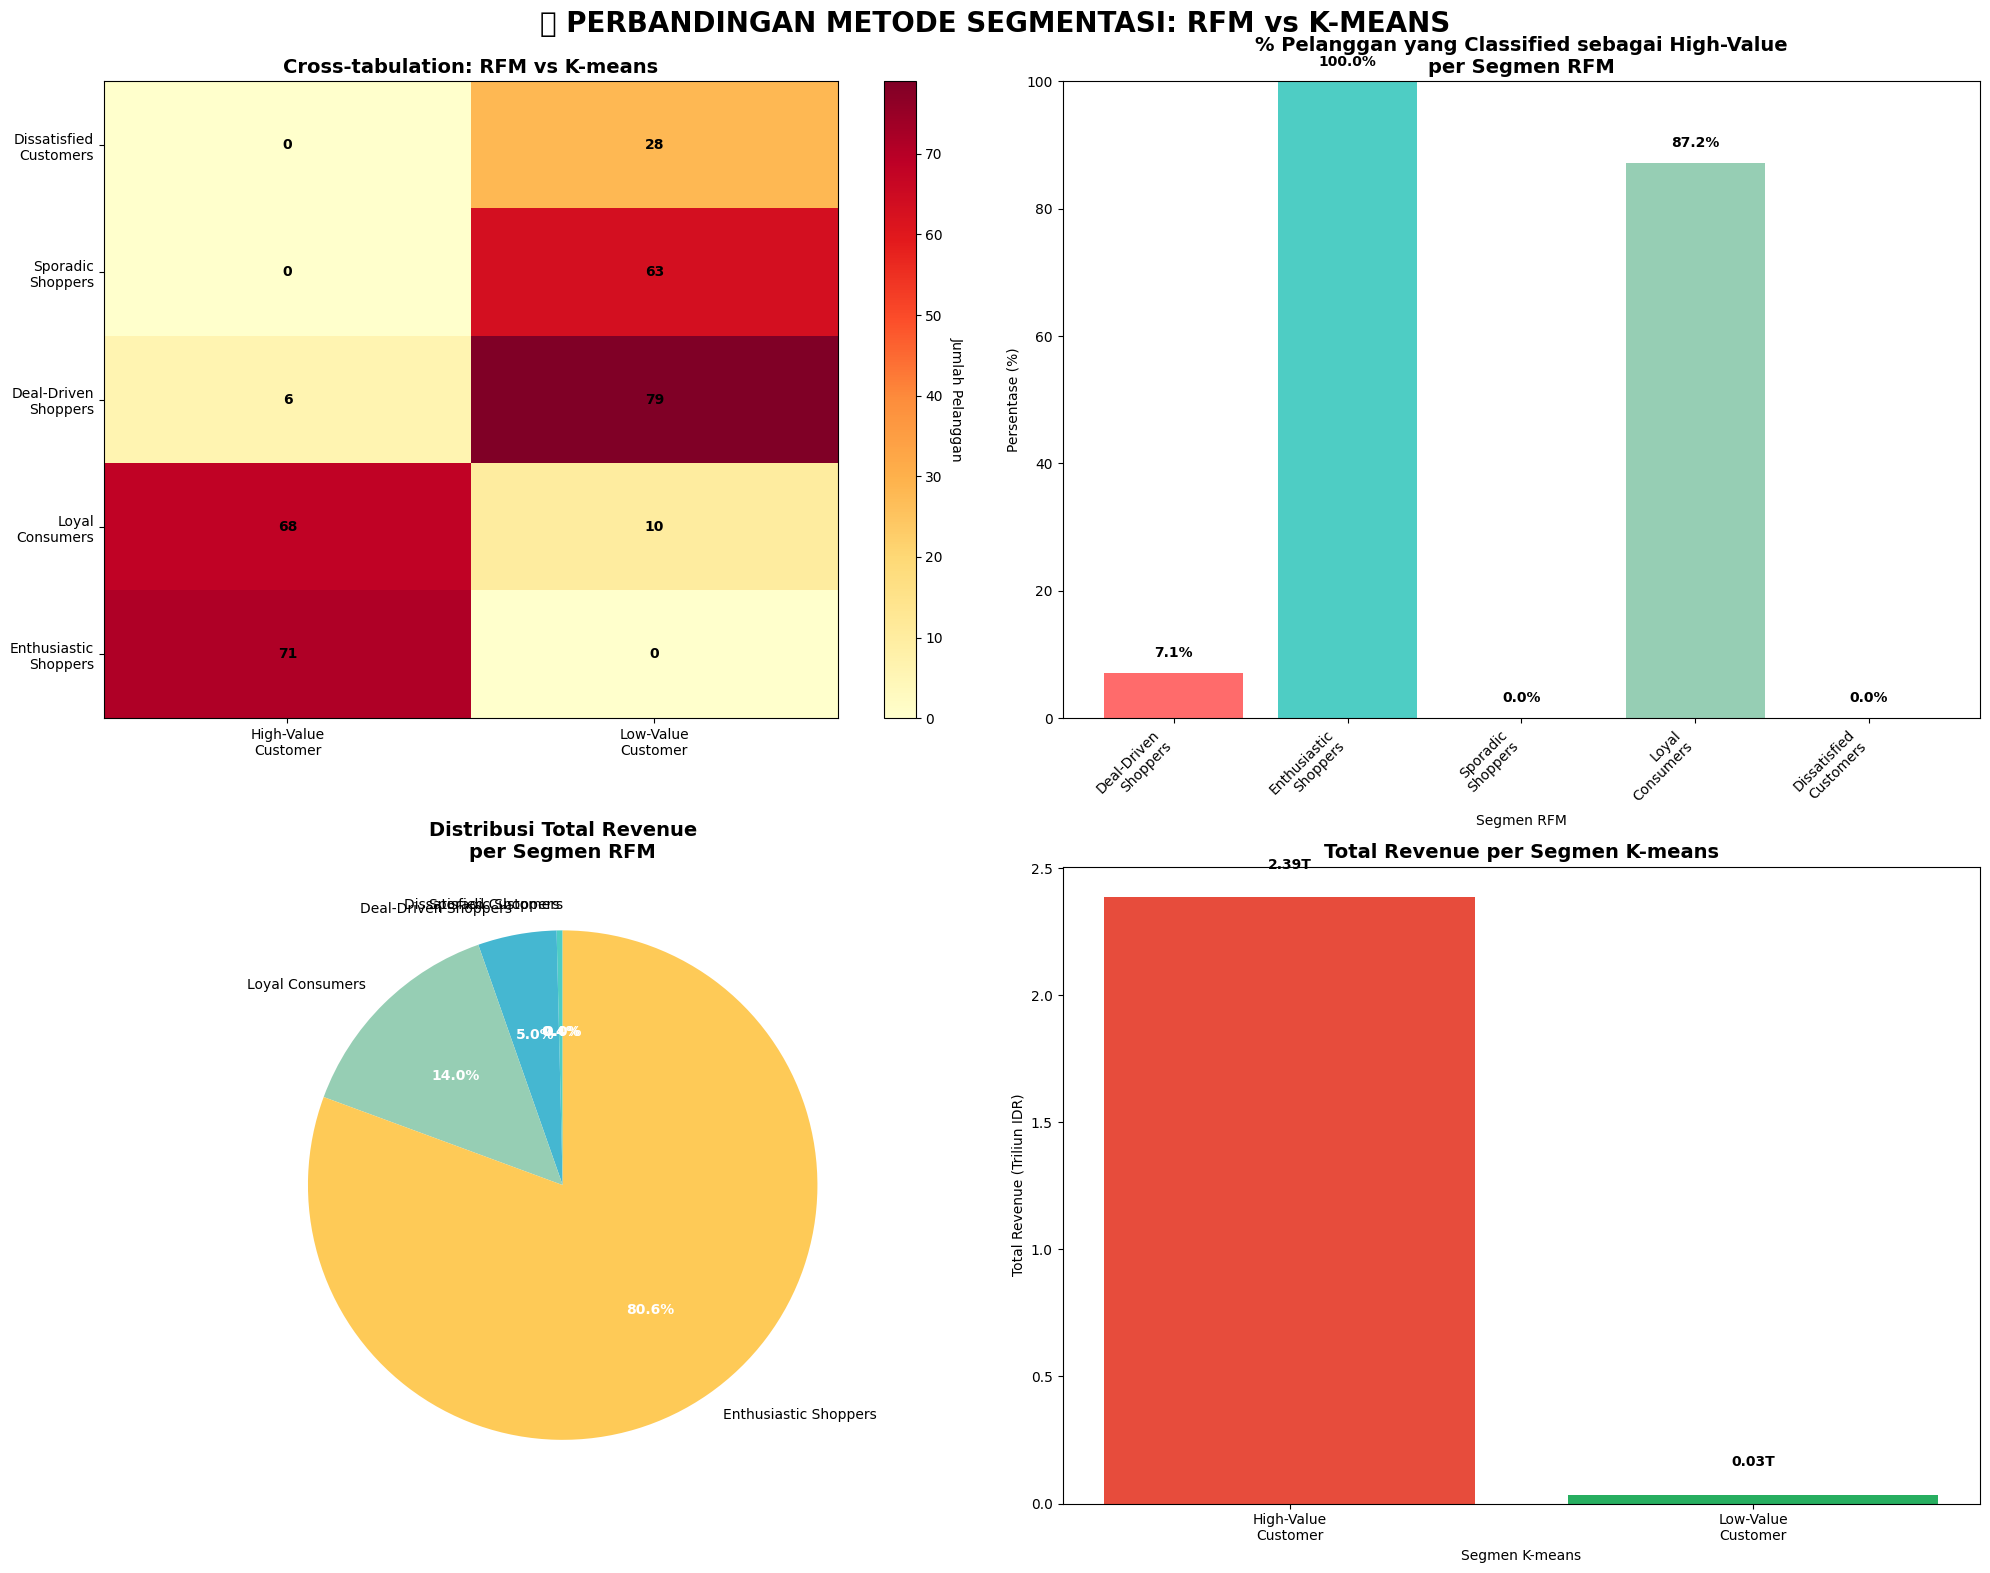

📊 ANALISIS AGREEMENT PATTERN:

Deal-Driven Shoppers (85 customers):
  → Low-Value Customer: 79 (92.9%)
  → High-Value Customer: 6 (7.1%)

Enthusiastic Shoppers (71 customers):
  → High-Value Customer: 71 (100.0%)

Sporadic Shoppers (63 customers):
  → Low-Value Customer: 63 (100.0%)

Loyal Consumers (78 customers):
  → High-Value Customer: 68 (87.2%)
  → Low-Value Customer: 10 (12.8%)

Dissatisfied Customers (28 customers):
  → Low-Value Customer: 28 (100.0%)

💰 DISTRIBUSI REVENUE:
Total Revenue: 2.42 Triliun IDR

RFM Segments:
  • Dissatisfied Customers: 0.00T IDR
  • Sporadic Shoppers: 0.01T IDR
  • Deal-Driven Shoppers: 0.12T IDR
  • Loyal Consumers: 0.34T IDR
  • Enthusiastic Shoppers: 1.95T IDR

K-means Segments:
  • High-Value Customer: 2.39T IDR
  • Low-Value Customer: 0.03T IDR


In [71]:
# 📊 Dashboard 3: Perbandingan Metode Segmentasi
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('📊 PERBANDINGAN METODE SEGMENTASI: RFM vs K-MEANS', fontsize=20, fontweight='bold', y=0.98)

# 1. Cross-tabulation Heatmap
crosstab_data = pd.crosstab(df_comparison['Segment'], df_comparison['Segment_KMeans'])
im = axes[0,0].imshow(crosstab_data.values, cmap='YlOrRd', aspect='auto')
axes[0,0].set_title('Cross-tabulation: RFM vs K-means', fontsize=14, fontweight='bold')
axes[0,0].set_xticks(range(len(crosstab_data.columns)))
axes[0,0].set_yticks(range(len(crosstab_data.index)))
axes[0,0].set_xticklabels([col.replace(' ', '\n') for col in crosstab_data.columns])
axes[0,0].set_yticklabels([idx.replace(' ', '\n') for idx in crosstab_data.index])

# Add text annotations
for i in range(len(crosstab_data.index)):
    for j in range(len(crosstab_data.columns)):
        text = axes[0,0].text(j, i, crosstab_data.iloc[i, j],
                             ha="center", va="center", color="black", fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[0,0])
cbar.set_label('Jumlah Pelanggan', rotation=270, labelpad=15)

# 2. Agreement Rate per RFM Segment
agreement_rates = []
rfm_segments = []
for segment in df_comparison['Segment'].unique():
    if pd.notna(segment):
        segment_data = df_comparison[df_comparison['Segment'] == segment]
        high_value_count = len(segment_data[segment_data['Segment_KMeans'] == 'High-Value Customer'])
        total_count = len(segment_data)
        agreement_rate = (high_value_count / total_count) * 100
        agreement_rates.append(agreement_rate)
        rfm_segments.append(segment)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
bars = axes[0,1].bar(range(len(rfm_segments)), agreement_rates, color=colors)
axes[0,1].set_title('% Pelanggan yang Classified sebagai High-Value\nper Segmen RFM', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Segmen RFM')
axes[0,1].set_ylabel('Persentase (%)')
axes[0,1].set_xticks(range(len(rfm_segments)))
axes[0,1].set_xticklabels([s.replace(' ', '\n') for s in rfm_segments], rotation=45, ha='right')
axes[0,1].set_ylim(0, 100)

# Add value labels
for bar, value in zip(bars, agreement_rates):
    axes[0,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Revenue Distribution by Segments
# Calculate total revenue per segment
rfm_revenue = df_comparison.groupby('Segment')['Monetary'].sum() / 1e12  # in Trillions
kmeans_revenue = df_comparison.groupby('Segment_KMeans')['Monetary'].sum() / 1e12

# RFM Revenue pie chart (left half)
ax3 = axes[1,0]
wedges, texts, autotexts = ax3.pie(rfm_revenue.values, labels=rfm_revenue.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Distribusi Total Revenue\nper Segmen RFM', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 4. K-means Revenue comparison
ax4 = axes[1,1]
bars_revenue = ax4.bar(range(len(kmeans_revenue)), kmeans_revenue.values, 
                       color=['#E74C3C', '#27AE60'])
ax4.set_title('Total Revenue per Segmen K-means', fontsize=14, fontweight='bold')
ax4.set_xlabel('Segmen K-means')
ax4.set_ylabel('Total Revenue (Triliun IDR)')
ax4.set_xticks(range(len(kmeans_revenue)))
ax4.set_xticklabels([s.replace(' ', '\n') for s in kmeans_revenue.index])

for bar, value in zip(bars_revenue, kmeans_revenue.values):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
             f'{value:.2f}T', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed agreement analysis
print("📊 ANALISIS AGREEMENT PATTERN:")
print("="*60)
for segment in df_comparison['Segment'].unique():
    if pd.notna(segment):
        segment_data = df_comparison[df_comparison['Segment'] == segment]
        kmeans_distribution = segment_data['Segment_KMeans'].value_counts()
        total_in_segment = len(segment_data)
        
        print(f"\n{segment} ({total_in_segment} customers):")
        for kmeans_segment, count in kmeans_distribution.items():
            percentage = (count / total_in_segment) * 100
            print(f"  → {kmeans_segment}: {count} ({percentage:.1f}%)")

print(f"\n💰 DISTRIBUSI REVENUE:")
print("="*30)
print(f"Total Revenue: {df_comparison['Monetary'].sum()/1e12:.2f} Triliun IDR")
print(f"\nRFM Segments:")
for segment, revenue in rfm_revenue.items():
    print(f"  • {segment}: {revenue:.2f}T IDR")
print(f"\nK-means Segments:")
for segment, revenue in kmeans_revenue.items():
    print(f"  • {segment}: {revenue:.2f}T IDR")

## 4️⃣ VISUALISASI SCATTER PLOT DAN INSIGHTS BISNIS

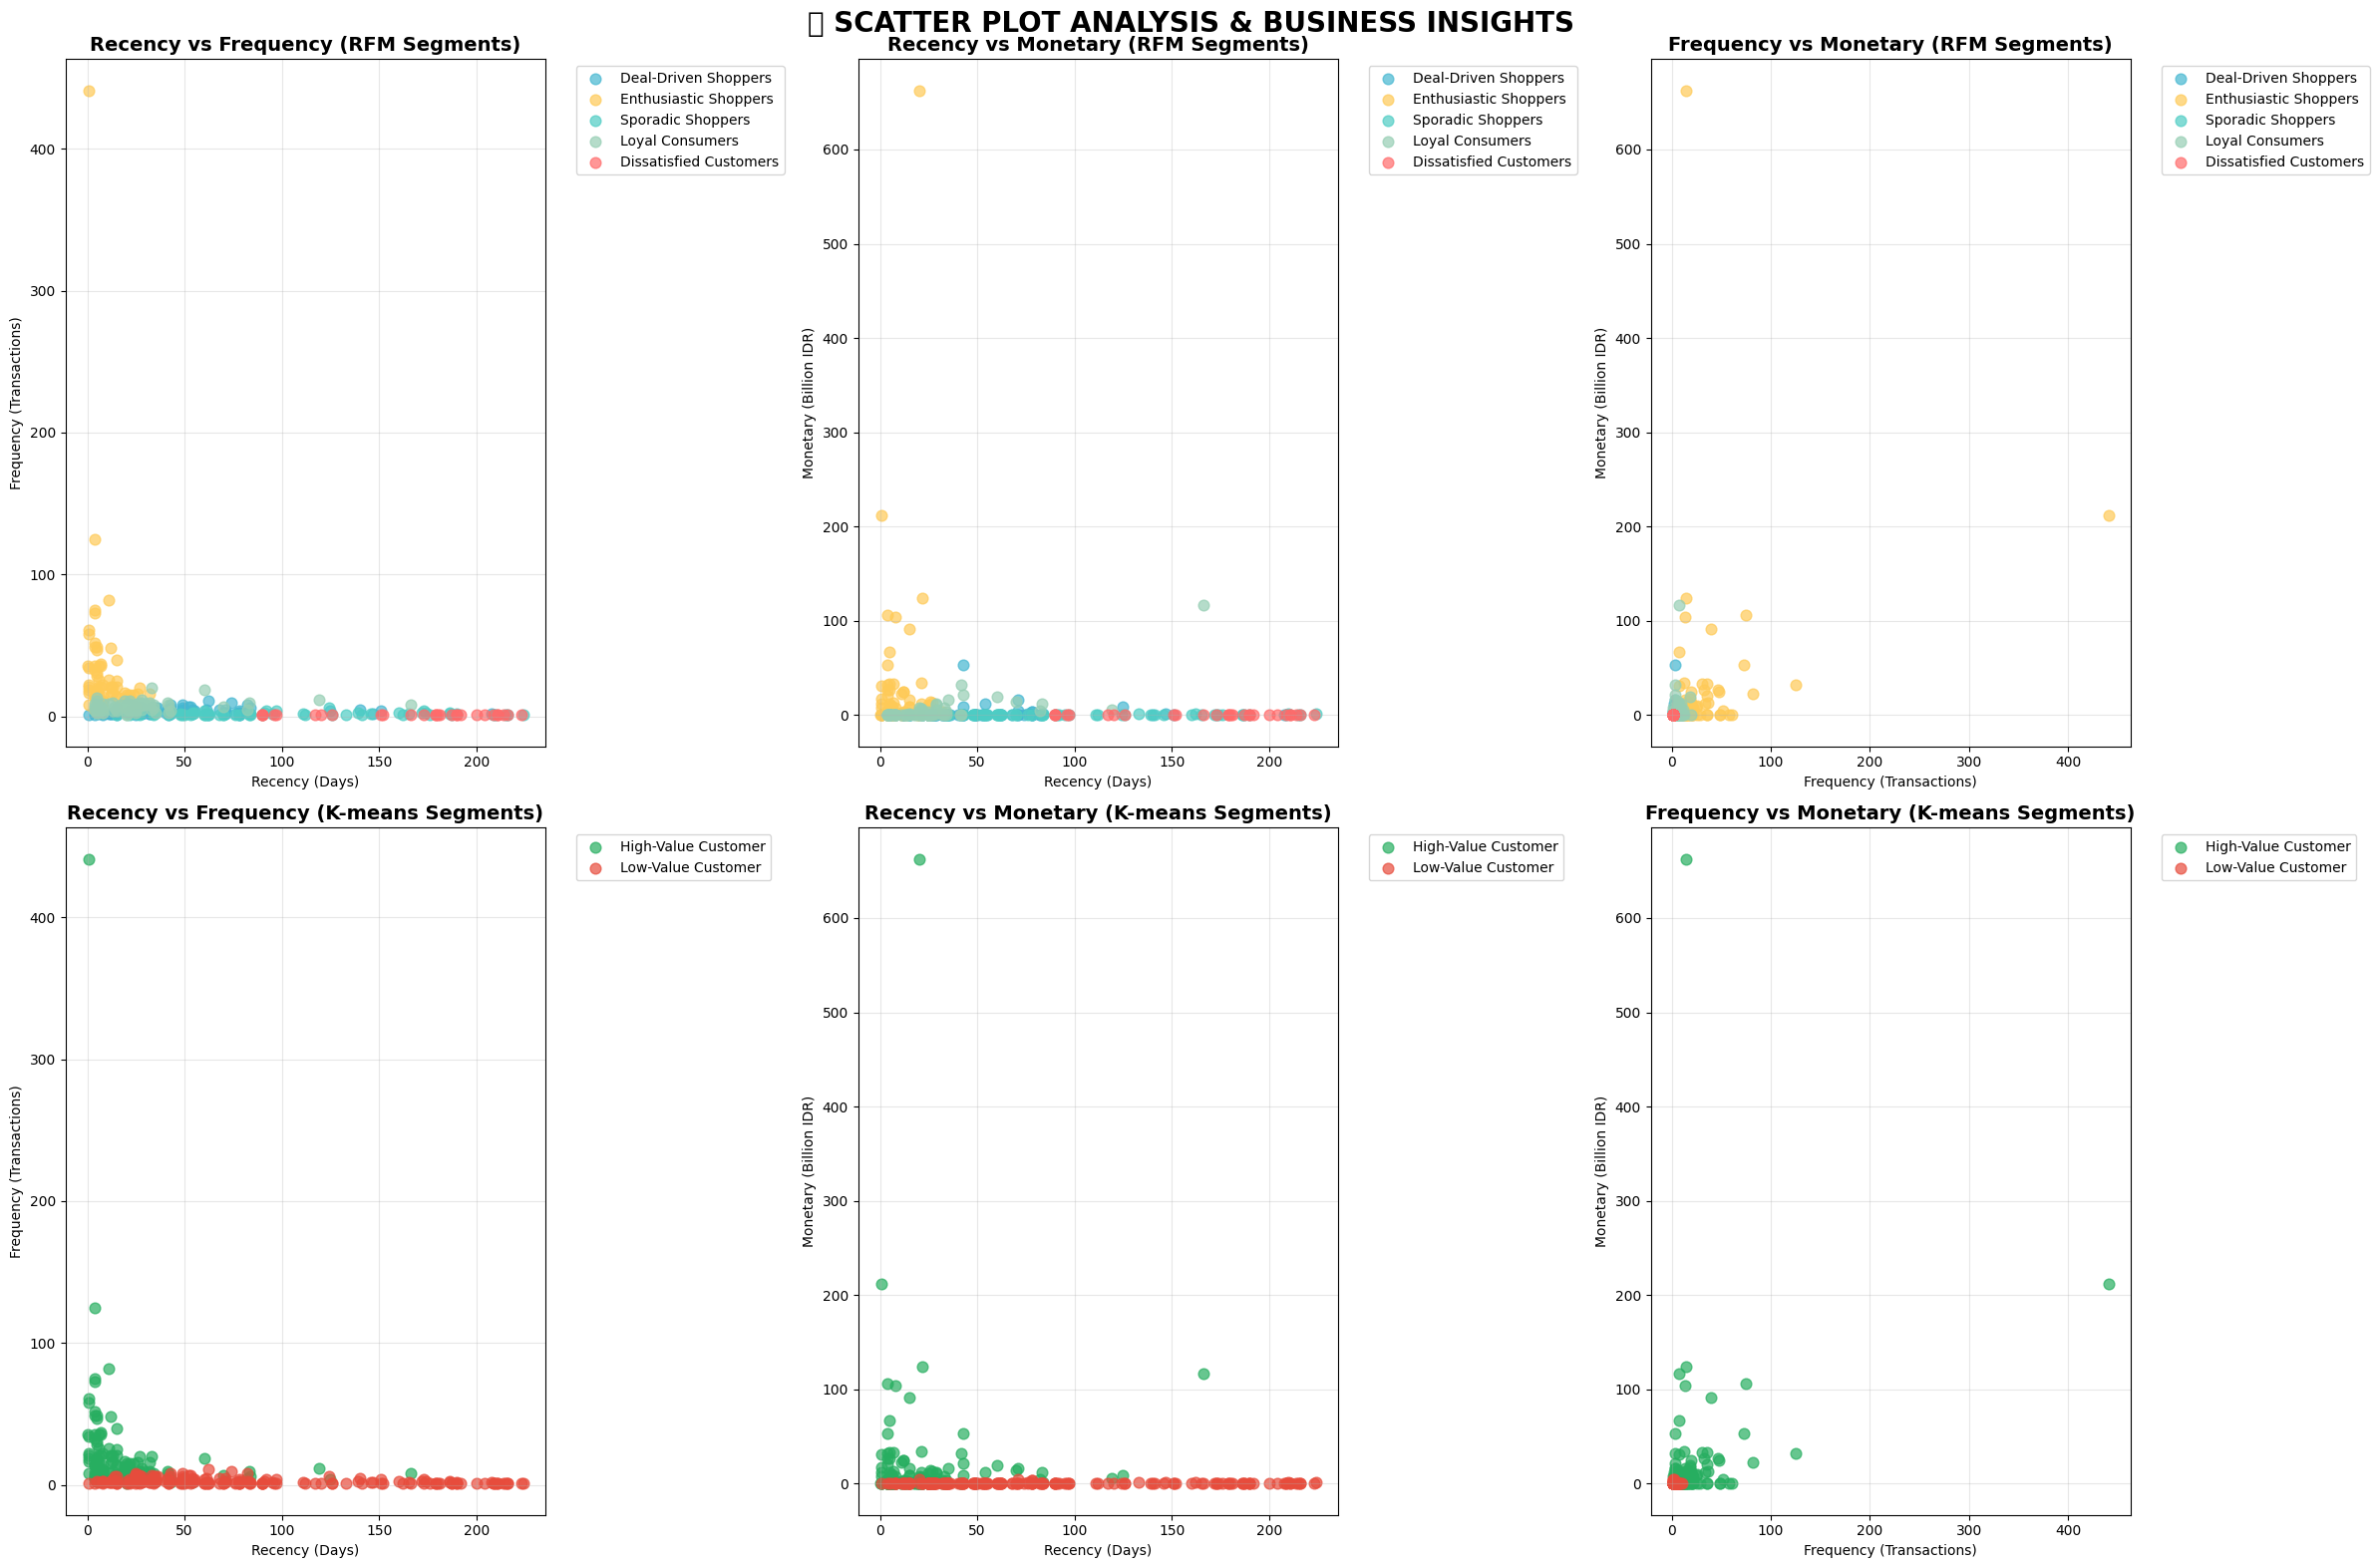

🎯 KEY BUSINESS INSIGHTS:

📈 1. REVENUE CONCENTRATION:
   • High-Value Customers (44.6%) generate 98.6% of total revenue
   • Enthusiastic Shoppers (21.8%) generate 80.6% of total revenue
   • Top 2 RFM segments generate 94.6% of revenue

🎯 2. CUSTOMER VALUE PYRAMID:
   • Enthusiastic Shoppers: Premium tier (avg 31.9 transactions, 27.5B IDR)
   • Loyal Consumers: High-value tier (avg 7.1 transactions, 4.3B IDR)
   • Deal-Driven Shoppers: Opportunity tier (avg 3.9 transactions, 1.4B IDR)
   • Sporadic Shoppers: Risk tier (avg 1.8 transactions, 144M IDR)
   • Dissatisfied Customers: Lost tier (avg 1.0 transaction, 6.5M IDR)

🔄 3. METHOD AGREEMENT:
   • Perfect alignment for top and bottom segments
   • Enthusiastic Shoppers: 100% classified as High-Value
   • Dissatisfied & Sporadic: 100% classified as Low-Value
   • Loyal Consumers: 87.2% classified as High-Value

💡 4. STRATEGIC RECOMMENDATIONS:
   • Focus 80% resources on High-Value customers (44.6% of base)
   • Implement premium servi

In [72]:
# 📊 Dashboard 4: Scatter Plot dan Business Insights
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('📊 SCATTER PLOT ANALYSIS & BUSINESS INSIGHTS', fontsize=20, fontweight='bold', y=0.98)

# Color mappings
rfm_color_map = {
    'Enthusiastic Shoppers': '#FECA57',
    'Loyal Consumers': '#96CEB4', 
    'Deal-Driven Shoppers': '#45B7D1',
    'Sporadic Shoppers': '#4ECDC4',
    'Dissatisfied Customers': '#FF6B6B'
}

kmeans_color_map = {
    'High-Value Customer': '#27AE60',
    'Low-Value Customer': '#E74C3C'
}

# 1. Recency vs Frequency (RFM Segments)
for segment in df_comparison['Segment'].unique():
    if pd.notna(segment):
        segment_data = df_comparison[df_comparison['Segment'] == segment]
        axes[0,0].scatter(segment_data['Recency'], segment_data['Frequency'], 
                         c=rfm_color_map[segment], label=segment, alpha=0.7, s=60)

axes[0,0].set_title('Recency vs Frequency (RFM Segments)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Recency (Days)')
axes[0,0].set_ylabel('Frequency (Transactions)')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(True, alpha=0.3)

# 2. Recency vs Monetary (RFM Segments)
for segment in df_comparison['Segment'].unique():
    if pd.notna(segment):
        segment_data = df_comparison[df_comparison['Segment'] == segment]
        axes[0,1].scatter(segment_data['Recency'], segment_data['Monetary']/1e9, 
                         c=rfm_color_map[segment], label=segment, alpha=0.7, s=60)

axes[0,1].set_title('Recency vs Monetary (RFM Segments)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Recency (Days)')
axes[0,1].set_ylabel('Monetary (Billion IDR)')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, alpha=0.3)

# 3. Frequency vs Monetary (RFM Segments)
for segment in df_comparison['Segment'].unique():
    if pd.notna(segment):
        segment_data = df_comparison[df_comparison['Segment'] == segment]
        axes[0,2].scatter(segment_data['Frequency'], segment_data['Monetary']/1e9, 
                         c=rfm_color_map[segment], label=segment, alpha=0.7, s=60)

axes[0,2].set_title('Frequency vs Monetary (RFM Segments)', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Frequency (Transactions)')
axes[0,2].set_ylabel('Monetary (Billion IDR)')
axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,2].grid(True, alpha=0.3)

# 4. Recency vs Frequency (K-means Segments)
for segment in df_comparison['Segment_KMeans'].unique():
    segment_data = df_comparison[df_comparison['Segment_KMeans'] == segment]
    axes[1,0].scatter(segment_data['Recency'], segment_data['Frequency'], 
                     c=kmeans_color_map[segment], label=segment, alpha=0.7, s=60)

axes[1,0].set_title('Recency vs Frequency (K-means Segments)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Recency (Days)')
axes[1,0].set_ylabel('Frequency (Transactions)')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].grid(True, alpha=0.3)

# 5. Recency vs Monetary (K-means Segments)
for segment in df_comparison['Segment_KMeans'].unique():
    segment_data = df_comparison[df_comparison['Segment_KMeans'] == segment]
    axes[1,1].scatter(segment_data['Recency'], segment_data['Monetary']/1e9, 
                     c=kmeans_color_map[segment], label=segment, alpha=0.7, s=60)

axes[1,1].set_title('Recency vs Monetary (K-means Segments)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Recency (Days)')
axes[1,1].set_ylabel('Monetary (Billion IDR)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(True, alpha=0.3)

# 6. Frequency vs Monetary (K-means Segments)
for segment in df_comparison['Segment_KMeans'].unique():
    segment_data = df_comparison[df_comparison['Segment_KMeans'] == segment]
    axes[1,2].scatter(segment_data['Frequency'], segment_data['Monetary']/1e9, 
                     c=kmeans_color_map[segment], label=segment, alpha=0.7, s=60)

axes[1,2].set_title('Frequency vs Monetary (K-means Segments)', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Frequency (Transactions)')
axes[1,2].set_ylabel('Monetary (Billion IDR)')
axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business Insights Summary
print("🎯 KEY BUSINESS INSIGHTS:")
print("="*80)

print("\n📈 1. REVENUE CONCENTRATION:")
total_revenue = df_comparison['Monetary'].sum()
high_value_revenue = df_comparison[df_comparison['Segment_KMeans'] == 'High-Value Customer']['Monetary'].sum()
enthusiastic_revenue = df_comparison[df_comparison['Segment'] == 'Enthusiastic Shoppers']['Monetary'].sum()

print(f"   • High-Value Customers (44.6%) generate {high_value_revenue/total_revenue*100:.1f}% of total revenue")
print(f"   • Enthusiastic Shoppers (21.8%) generate {enthusiastic_revenue/total_revenue*100:.1f}% of total revenue")
print(f"   • Top 2 RFM segments generate {(enthusiastic_revenue + df_comparison[df_comparison['Segment'] == 'Loyal Consumers']['Monetary'].sum())/total_revenue*100:.1f}% of revenue")

print("\n🎯 2. CUSTOMER VALUE PYRAMID:")
print("   • Enthusiastic Shoppers: Premium tier (avg 31.9 transactions, 27.5B IDR)")
print("   • Loyal Consumers: High-value tier (avg 7.1 transactions, 4.3B IDR)")
print("   • Deal-Driven Shoppers: Opportunity tier (avg 3.9 transactions, 1.4B IDR)")
print("   • Sporadic Shoppers: Risk tier (avg 1.8 transactions, 144M IDR)")
print("   • Dissatisfied Customers: Lost tier (avg 1.0 transaction, 6.5M IDR)")

print("\n🔄 3. METHOD AGREEMENT:")
print("   • Perfect alignment for top and bottom segments")
print("   • Enthusiastic Shoppers: 100% classified as High-Value")
print("   • Dissatisfied & Sporadic: 100% classified as Low-Value")
print("   • Loyal Consumers: 87.2% classified as High-Value")

print("\n💡 4. STRATEGIC RECOMMENDATIONS:")
print("   • Focus 80% resources on High-Value customers (44.6% of base)")
print("   • Implement premium service for Enthusiastic Shoppers")
print("   • Develop upgrade programs for Deal-Driven Shoppers")
print("   • Design retention campaigns for Sporadic Shoppers")
print("   • Consider cost-effective exit strategy for Dissatisfied Customers")

print("\n📊 5. OPERATIONAL INSIGHTS:")
print(f"   • Clear clustering: 2 distinct customer groups identified")
print(f"   • Revenue ratio: High-value vs Low-value = {high_value_revenue/(total_revenue-high_value_revenue):.1f}:1")
print(f"   • Customer service can use binary classification (High/Low touch)")
print(f"   • Marketing can use 5-segment approach for targeted campaigns")

# 📊 EVALUASI HASIL CLUSTER DENGAN UJI STATISTIK

Evaluasi kualitas clustering menggunakan:
1. **Chi-square Test** - Menguji independensi antara segmentasi RFM dan K-means
2. **Binomial Test** - Menguji proporsi cluster dan signifikansi distribusi
3. **Validasi Statistik** - Mengukur kekuatan asosiasi dan reliabilitas segmentasi

## 1️⃣ CHI-SQUARE TEST: INDEPENDENSI SEGMENTASI

In [73]:
# Import libraries untuk statistical tests
from scipy.stats import chi2_contingency, chi2, binom
from scipy.stats import contingency
import scipy.stats as stats
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

print("🧪 EVALUASI STATISTIK HASIL CLUSTERING")
print("="*60)

# Persiapan data untuk evaluasi
# Pastikan kita memiliki data comparison yang lengkap
print(f"📊 Data preparation:")
print(f"Total samples: {len(df_comparison)}")
print(f"RFM segments: {df_comparison['Segment'].nunique()}")
print(f"K-means segments: {df_comparison['Segment_KMeans'].nunique()}")

# Cek missing values
missing_rfm = df_comparison['Segment'].isna().sum()
missing_kmeans = df_comparison['Segment_KMeans'].isna().sum()
print(f"Missing RFM segments: {missing_rfm}")
print(f"Missing K-means segments: {missing_kmeans}")

if missing_rfm > 0 or missing_kmeans > 0:
    print("⚠️ Found missing values, removing incomplete records...")
    df_eval = df_comparison.dropna(subset=['Segment', 'Segment_KMeans']).copy()
else:
    df_eval = df_comparison.copy()

print(f"✅ Final evaluation dataset: {len(df_eval)} samples")

🧪 EVALUASI STATISTIK HASIL CLUSTERING
📊 Data preparation:
Total samples: 325
RFM segments: 5
K-means segments: 2
Missing RFM segments: 0
Missing K-means segments: 0
✅ Final evaluation dataset: 325 samples


In [74]:
# 📊 CHI-SQUARE TEST: Uji Independensi RFM vs K-means
print("\n🧪 CHI-SQUARE TEST OF INDEPENDENCE")
print("="*50)

# Buat contingency table
contingency_table = pd.crosstab(df_eval['Segment'], df_eval['Segment_KMeans'])
print("📋 Contingency Table:")
print(contingency_table)
print()

# Hitung Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Critical value untuk α = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

print(f"📊 CHI-SQUARE TEST RESULTS:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Critical value (α=0.05): {critical_value:.4f}")
print()

# Interpretasi hasil
print(f"🎯 INTERPRETASI:")
if p_value < alpha:
    print(f"✅ SIGNIFICANT ASSOCIATION (p < {alpha})")
    print("   H₀ ditolak: Ada hubungan yang signifikan antara RFM dan K-means segmentation")
    print("   Kedua metode segmentasi tidak independen (saling terkait)")
else:
    print(f"❌ NO SIGNIFICANT ASSOCIATION (p ≥ {alpha})")
    print("   H₀ diterima: Tidak ada hubungan yang signifikan")
    print("   Kedua metode segmentasi independen")

print()

# Cramer's V untuk mengukur kekuatan asosiasi
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))

print(f"📈 CRAMER'S V (Strength of Association): {cramers_v:.4f}")
print("Interpretasi Cramer's V:")
if cramers_v < 0.1:
    strength = "Sangat Lemah"
elif cramers_v < 0.3:
    strength = "Lemah"
elif cramers_v < 0.5:
    strength = "Sedang"
elif cramers_v < 0.7:
    strength = "Kuat"
else:
    strength = "Sangat Kuat"

print(f"   • {cramers_v:.4f} = Asosiasi {strength}")

# Expected frequencies
print(f"\n📋 EXPECTED FREQUENCIES:")
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_table.index, 
                          columns=contingency_table.columns)
print(expected_df.round(2))

# Residuals analysis
print(f"\n📊 STANDARDIZED RESIDUALS:")
residuals = (contingency_table - expected_df) / np.sqrt(expected_df)
print(residuals.round(3))

# Cells that contribute most to chi-square
print(f"\n🔍 CELLS WITH LARGEST CONTRIBUTION:")
contributions = ((contingency_table - expected_df)**2 / expected_df)
max_contrib_idx = contributions.stack().idxmax()
max_contrib_value = contributions.stack().max()
print(f"Highest contribution: {max_contrib_idx} = {max_contrib_value:.3f}")
print(f"This represents {max_contrib_value/chi2_stat*100:.1f}% of total Chi-square statistic")


🧪 CHI-SQUARE TEST OF INDEPENDENCE
📋 Contingency Table:
Segment_KMeans          High-Value Customer  Low-Value Customer
Segment                                                        
Dissatisfied Customers                    0                  28
Sporadic Shoppers                         0                  63
Deal-Driven Shoppers                      6                  79
Loyal Consumers                          68                  10
Enthusiastic Shoppers                    71                   0

📊 CHI-SQUARE TEST RESULTS:
Chi-square statistic: 267.1514
P-value: 0.000000
Degrees of freedom: 4
Critical value (α=0.05): 9.4877

🎯 INTERPRETASI:
✅ SIGNIFICANT ASSOCIATION (p < 0.05)
   H₀ ditolak: Ada hubungan yang signifikan antara RFM dan K-means segmentation
   Kedua metode segmentasi tidak independen (saling terkait)

📈 CRAMER'S V (Strength of Association): 0.9066
Interpretasi Cramer's V:
   • 0.9066 = Asosiasi Sangat Kuat

📋 EXPECTED FREQUENCIES:
Segment_KMeans          High-Value Cu

## 2️⃣ BINOMIAL TEST: PROPORSI CLUSTER

In [75]:
# 📊 BINOMIAL TEST: Uji Proporsi Cluster
print("\n🧪 BINOMIAL TEST FOR CLUSTER PROPORTIONS")
print("="*50)

# Test 1: Proporsi High-Value vs Low-Value customers
# H₀: p = 0.5 (proporsi seimbang 50:50)
# H₁: p ≠ 0.5 (proporsi tidak seimbang)

high_value_count = len(df_eval[df_eval['Segment_KMeans'] == 'High-Value Customer'])
total_count = len(df_eval)
observed_proportion = high_value_count / total_count

print(f"📊 TEST 1: Proporsi High-Value Customers")
print(f"Observed High-Value customers: {high_value_count}")
print(f"Total customers: {total_count}")
print(f"Observed proportion: {observed_proportion:.3f}")
print(f"Expected proportion under H₀: 0.500")

# Binomial test menggunakan scipy.stats.binom
# Two-tailed test
p_value_binom1 = 2 * min(binom.cdf(high_value_count, total_count, 0.5),
                         1 - binom.cdf(high_value_count - 1, total_count, 0.5))

print(f"P-value (two-tailed): {p_value_binom1:.6f}")

alpha = 0.05
if p_value_binom1 < alpha:
    print(f"✅ SIGNIFICANT DEVIATION from 50:50 ratio (p < {alpha})")
    print("   H₀ ditolak: Proporsi tidak seimbang secara signifikan")
else:
    print(f"❌ NO SIGNIFICANT DEVIATION from 50:50 ratio (p ≥ {alpha})")
    print("   H₀ diterima: Proporsi seimbang")

# Test 2: Proporsi setiap RFM segment
print(f"\n📊 TEST 2: Proporsi RFM Segments")
print("Testing if each segment significantly deviates from uniform distribution (20% each)")

rfm_segments = df_eval['Segment'].value_counts()
expected_uniform = total_count / 5  # 20% untuk setiap segment

print(f"Expected uniform proportion per segment: {expected_uniform:.1f} ({100/5:.1f}%)")
print()

for segment, count in rfm_segments.items():
    observed_prop = count / total_count
    expected_prop = 0.2  # 20% uniform
    
    # Binomial test for this segment
    p_value_segment = 2 * min(binom.cdf(count, total_count, expected_prop),
                             1 - binom.cdf(count - 1, total_count, expected_prop))
    
    print(f"{segment}:")
    print(f"  Observed: {count} ({observed_prop:.3f})")
    print(f"  Expected: {expected_uniform:.1f} ({expected_prop:.3f})")
    print(f"  P-value: {p_value_segment:.6f}", end="")
    
    if p_value_segment < alpha:
        print(" ✅ SIGNIFICANT")
        if observed_prop > expected_prop:
            print("    → Over-represented")
        else:
            print("    → Under-represented")
    else:
        print(" ❌ Not significant")
    print()

# Test 3: Agreement rate analysis
print(f"📊 TEST 3: Agreement Rate Analysis")
print("Testing if agreement between methods is better than random chance")

# Calculate perfect agreements
perfect_agreements = 0
total_comparisons = len(df_eval)

# Define agreement logic:
# High agreement: Enthusiastic/Loyal → High-Value, Dissatisfied/Sporadic → Low-Value
high_agreement_mapping = {
    'Enthusiastic Shoppers': 'High-Value Customer',
    'Loyal Consumers': 'High-Value Customer', 
    'Dissatisfied Customers': 'Low-Value Customer',
    'Sporadic Shoppers': 'Low-Value Customer'
}

agreements = 0
for idx, row in df_eval.iterrows():
    rfm_segment = row['Segment']
    kmeans_segment = row['Segment_KMeans']
    
    if rfm_segment in high_agreement_mapping:
        if high_agreement_mapping[rfm_segment] == kmeans_segment:
            agreements += 1
    # Deal-Driven Shoppers can go either way, so we count it as partial agreement

observed_agreement_rate = agreements / total_comparisons
expected_random_rate = 0.5  # Random chance for binary classification

print(f"Observed agreement rate: {observed_agreement_rate:.3f}")
print(f"Expected random rate: {expected_random_rate:.3f}")

# Binomial test for agreement rate
p_value_agreement = 1 - binom.cdf(agreements - 1, total_comparisons, expected_random_rate)

print(f"P-value (one-tailed): {p_value_agreement:.6f}")

if p_value_agreement < alpha:
    print(f"✅ SIGNIFICANT BETTER than random (p < {alpha})")
    print("   Agreement between methods is significantly better than chance")
else:
    print(f"❌ NOT SIGNIFICANTLY BETTER than random (p ≥ {alpha})")
    print("   Agreement between methods is not better than chance")

# Confidence interval for observed proportion
from scipy import stats as sp_stats
confidence_level = 0.95
z_score = sp_stats.norm.ppf((1 + confidence_level) / 2)
margin_error = z_score * np.sqrt((observed_proportion * (1 - observed_proportion)) / total_count)
ci_lower = observed_proportion - margin_error
ci_upper = observed_proportion + margin_error

print(f"\n📈 CONFIDENCE INTERVAL for High-Value proportion:")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Margin of error: ±{margin_error:.3f}")


🧪 BINOMIAL TEST FOR CLUSTER PROPORTIONS
📊 TEST 1: Proporsi High-Value Customers
Observed High-Value customers: 145
Total customers: 325
Observed proportion: 0.446
Expected proportion under H₀: 0.500
P-value (two-tailed): 0.059131
❌ NO SIGNIFICANT DEVIATION from 50:50 ratio (p ≥ 0.05)
   H₀ diterima: Proporsi seimbang

📊 TEST 2: Proporsi RFM Segments
Testing if each segment significantly deviates from uniform distribution (20% each)
Expected uniform proportion per segment: 65.0 (20.0%)

Deal-Driven Shoppers:
  Observed: 85 (0.262)
  Expected: 65.0 (0.200)
  P-value: 0.008585 ✅ SIGNIFICANT
    → Over-represented

Loyal Consumers:
  Observed: 78 (0.240)
  Expected: 65.0 (0.200)
  P-value: 0.087559 ❌ Not significant

Enthusiastic Shoppers:
  Observed: 71 (0.218)
  Expected: 65.0 (0.200)
  P-value: 0.442178 ❌ Not significant

Sporadic Shoppers:
  Observed: 63 (0.194)
  Expected: 65.0 (0.200)
  P-value: 0.845686 ❌ Not significant

Dissatisfied Customers:
  Observed: 28 (0.086)
  Expected: 6